# EasyVisa Project

## Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
# Libraries for reading and manipulating data
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To filter warnings on updated python versions
import warnings
warnings.filterwarnings('ignore')

# Library to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# To tune different models
from sklearn.model_selection import GridSearchCV

# To measure classification performance
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Libraries to build Decision Tree and different ensemble classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

# To build model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# To install xgboost library
from xgboost import XGBClassifier

## Loading the dataset

In [ ]:
# Giving Colab access to Drive
from google.colab import drive
drive.mount('/content/drive')

# Uploading the dataset
data = pd.read_csv('/content/drive/My Drive/PG Data Science and Business Analysis/Project 5: EasyVisa/EasyVisa.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Making a copy of the dataset to avoid changes to the original
df = data.copy()

## Data overview

- Observations
- Sanity checks

### Viewing the first and last 5 rows of the dataset

In [ ]:
# Looking at the first 5 rows
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
# Looking at the last 5 rows
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


* The dataset has been loaded properly.
* The columns are as described in the data dictionary and have information attributed to each case id displayed in rows.
* The columns are as described in the data dictionary.

### Checking the shape of the dataset

In [ ]:
df.shape

(25480, 12)

* There are 25480 rows and 12 columns.

### Looking at the data types for each column

In [ ]:
# Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


* There are no missing values in the dataset.
* There are 3 columns of numerical type (no_of_employees, yr_of_estab, and prevailing_wage).
* All other variables are of object type.
* yr_of_estab was interpreted as numerical even though we know it corresponds to the year in which the company was established.
* Dependent variable (case_status) is of object type.
* We will convert object type columns to category to reduces the memory size.   Converting to category reduces the memory size and the process will be quicker.

### Fixing the datatypes

In [ ]:
# Looking at columns of object type
cols = df.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
# Converting from object to category
for i in cols.columns:
    df[i] = df[i].astype('category')

In [ ]:
# Checking that the change was done correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


* Memory usage has decreased slightly but not significantly.

### Checking for missing and duplicated values

In [ ]:
# Checking for missing values
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [ ]:
# Checking for duplicated values
df.duplicated().sum()

0

* There are no missing values in the dataset.
* There are no duplicates.

### Checking the statistical summary of all columns

In [ ]:
# Looking at the statistical summary of all variables
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Case id has all unique values. We will drop this column as it provides no significant value to the analysis or model.
* There are 6 continents in the dataset. Asia is the most common one with 16861 requests being from there.
* There are 4 unique values on education of the employee. 10234 cases have a bachelor's degree.
* A little over half of the cases have job experience (14802).
* Most of the people don'trequire job training (22525 out of 25480).
* Number of employees has negative values. We will look into this further.
* Employer's companies were established between 1800 and 2016.
* There are 5 unique value on region of employment. The most requested region is Northeast with 7195.
* The average prevailing wage is 74455.81. There is a big variance in this column, between 2.1367 and 319210.27. It could be influenced by the unit of wage.
* Most units of wage are Year, with 22962 out of 25480. There are 4 unique values.
* 22773 workers have a full time job.
* 17018 visas out of 25480 were certified.

### Dropping the column 'case_id' with all unique values

In [ ]:
# Checking that 'case_id' has all unique values
df.case_id.nunique()

25480

In [ ]:
# Dropping the column with all unique values
df = df.drop(['case_id'], axis=1)

# Checking that the column was dropped
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


* Case_id was dropped correctly.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which help generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, is done.

### Leading Questions:

1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### Defining needed functions to carry out EDA

In [ ]:
# Function to plot boxplot and histogram

def histogram_boxplot(data, feature, figsize=(15, 10), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is True)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # Annotate the percentage

    plt.show()  # Show the plot

In [ ]:
# Function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# Function to plot stacked bar chart for categories

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate analysis

#### Continent of the employee

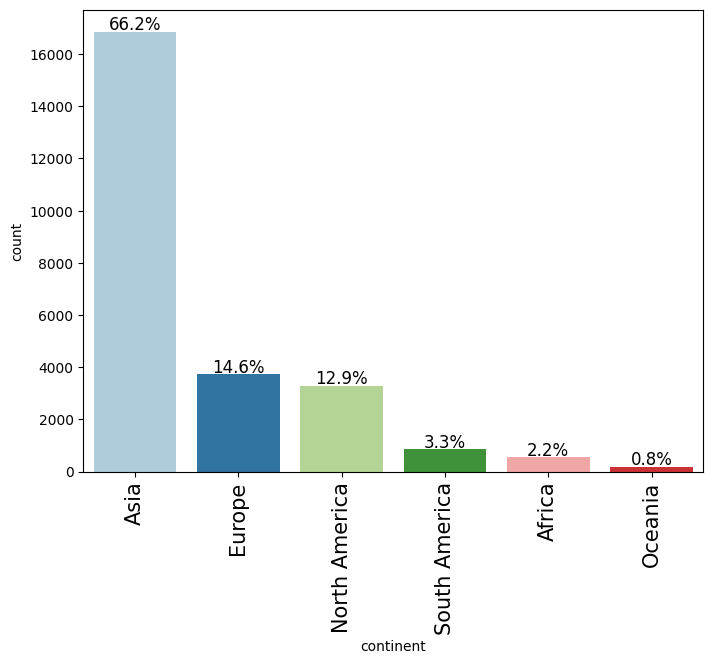

In [ ]:
# Visual on continent
labeled_barplot(df, 'continent')

* More than have of the workers are from Asia (66.2%).
* Followed by Europe and North America with 14.6% and 12.9% respectively.
* South America, Africa, and Oceania have very low percentages.

#### Education of the employee

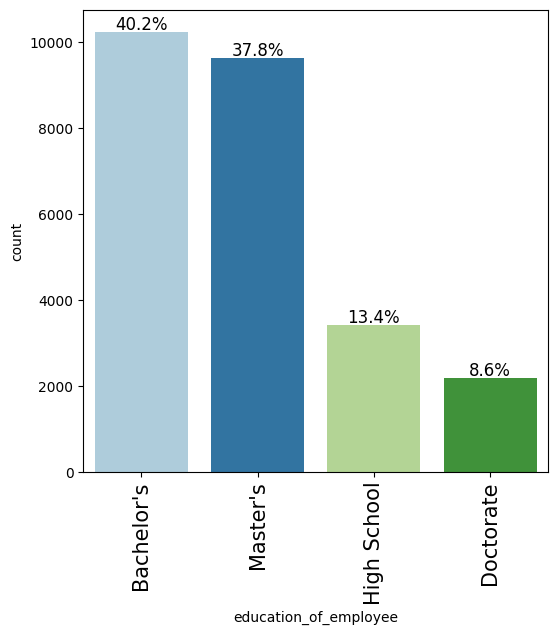

In [ ]:
# Visual on education level
labeled_barplot(df, 'education_of_employee')

* Most workers have higher education. 40.2% have at least a bachelor's degree.
* 13.4% of workers have a High School education.
* Only 8.6% of the workers have a doctorate.

#### If the employee has job experience or not

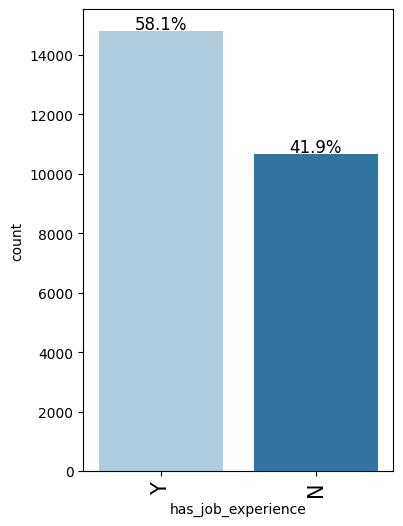

In [ ]:
# Visual on job experience
labeled_barplot(df, 'has_job_experience')

* 58.1% of the workers have job experience.

#### If the employee requires job training or not

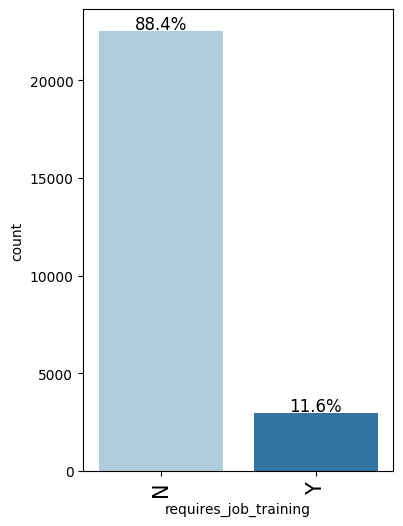

In [ ]:
# Visual on requires job training
labeled_barplot(df, 'requires_job_training')

* 88.4% of the workers don't require job training.
* This is surprising compared to the amount of workers without job experience.

#### Number of employees in the employer's company

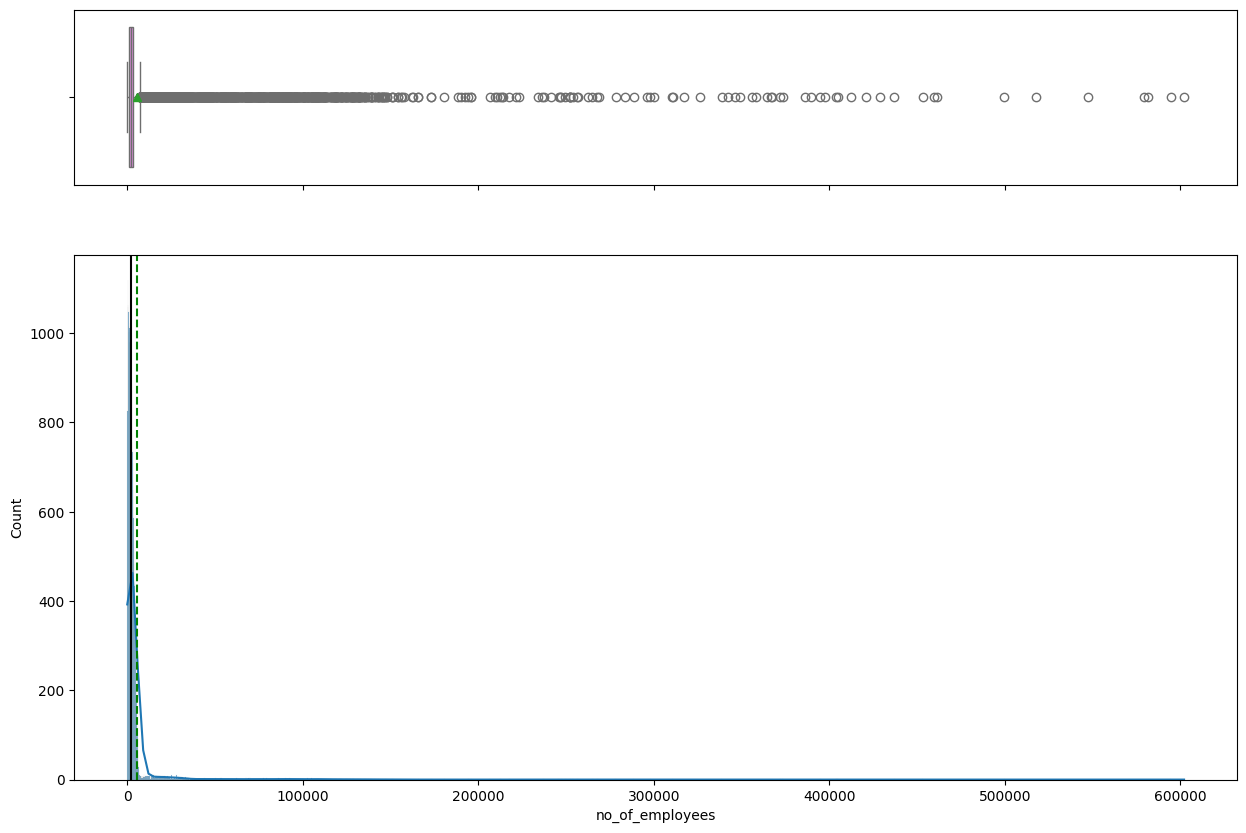

In [ ]:
# Visual for number of employees
histogram_boxplot(df, 'no_of_employees')

**We know that there were negative values in this column. It is not possible for a company to have negative employees. We will treat them even if they don't appear as outliers.**
* We will first check how many companies have negative values in this column.

In [ ]:
# Looking at cases with negative values in number of employees
df.loc[data['no_of_employees']<=0]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


* Many rows have negative values in the number of employees column. They could be typos, we can replace them for their positive values (the absolute value).

In [ ]:
# Changing the negative values for positive in number of employees
df['no_of_employees'] = abs(df['no_of_employees'])

In [ ]:
# Checking the change was done
df.loc[data['no_of_employees']<=0]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,Europe,Master's,N,N,25,1980,Northeast,39452.9900,Year,Y,Certified
378,Asia,Bachelor's,N,Y,11,2011,Northeast,32506.1400,Year,Y,Denied
832,South America,Master's,Y,N,17,2002,South,129701.9400,Year,Y,Certified
2918,Asia,Master's,Y,N,26,2005,Midwest,112799.4600,Year,Y,Certified
6439,Asia,Bachelor's,N,N,14,2013,South,103.9700,Hour,Y,Denied
6634,Asia,Bachelor's,Y,N,26,1923,West,5247.3200,Year,Y,Denied
7224,Europe,Doctorate,N,N,25,1998,Midwest,141435.9500,Year,Y,Certified
7281,Asia,High School,N,N,14,2000,Midwest,58488.5000,Year,Y,Denied
7318,Asia,Bachelor's,Y,Y,26,2006,South,115005.6100,Year,Y,Certified
7761,Asia,Master's,N,N,11,2009,Midwest,38457.5100,Year,Y,Certified


* All the negative values in the number of employees column has been changed to their absolute vaue.

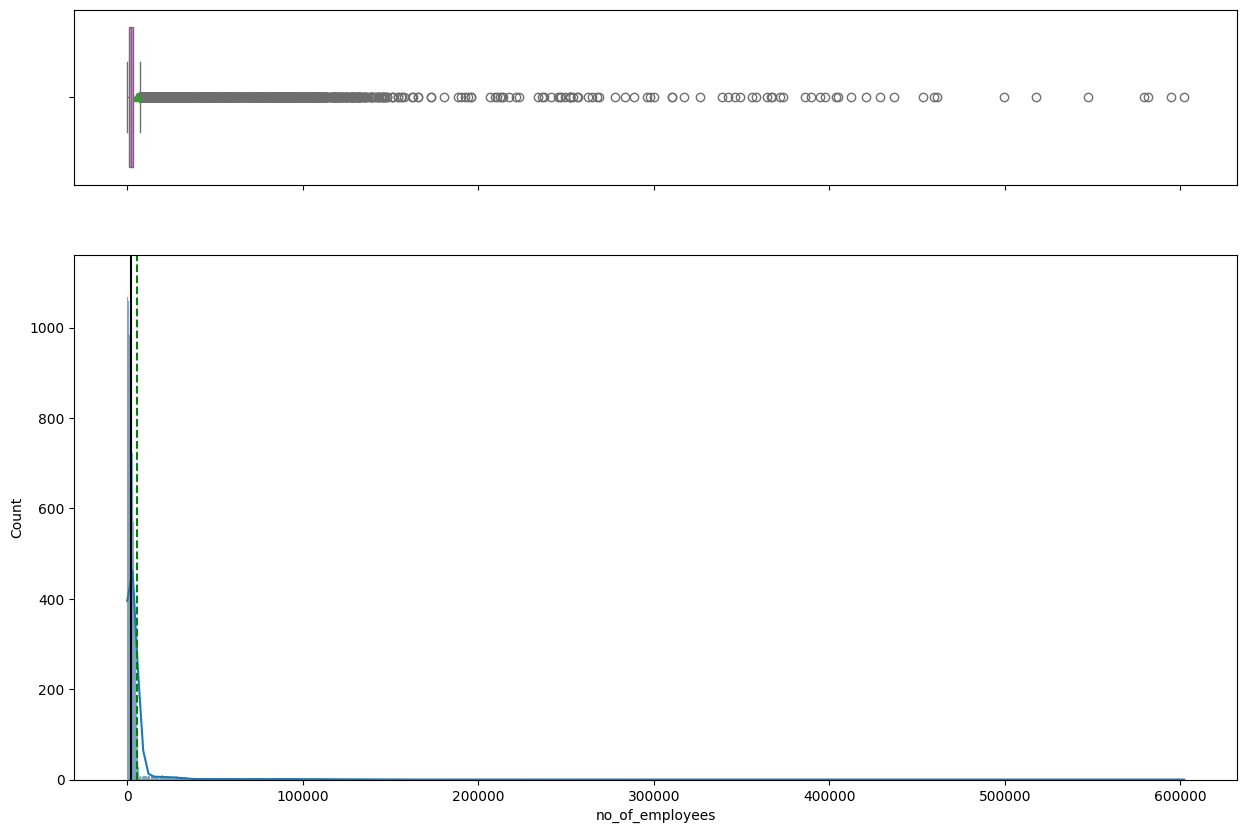

In [ ]:
# Checking if there are changes in the visuals
histogram_boxplot(df, 'no_of_employees')

* The distribution is heavily right skewed.
* There are many outliers on the upper side.
* Most companies have less than 10000 employees. Which makes sense since the statistical summary showed that the third quartile was around 3500 employees.

#### Year in which the employer's company was established

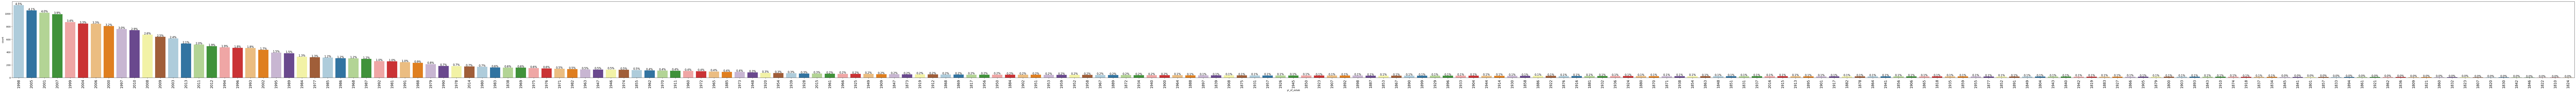

In [ ]:
# Visual of year of establishment
labeled_barplot(df, 'yr_of_estab')

* This variable doesn't tell us much information.
* We will keep it as it can provide valuable information on visa approvals.

#### Foreign worker's intended region of employment in the US

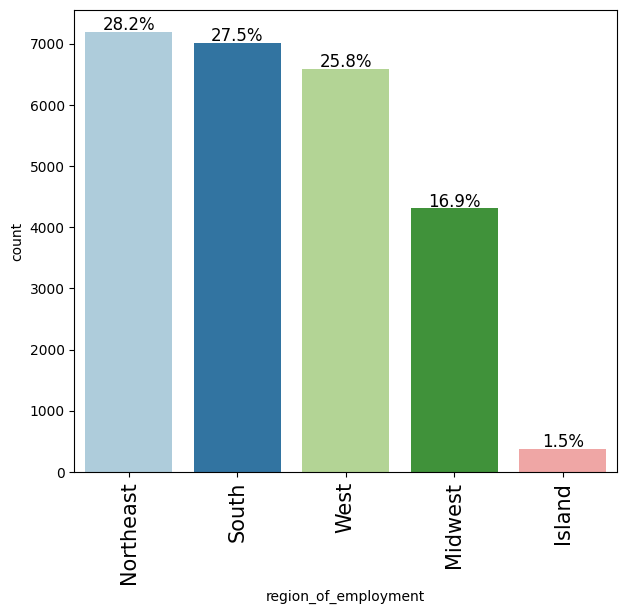

In [ ]:
# Visual on region of employment
labeled_barplot(df, 'region_of_employment')

* Most workers request Northeast, South, or West as their region of employment. Between 25% and 29%.
* Less than 2% of the workers request Island as the region of employment.

#### Average wage paid to similarly employed workers in a specific occupation in the area of intended employment

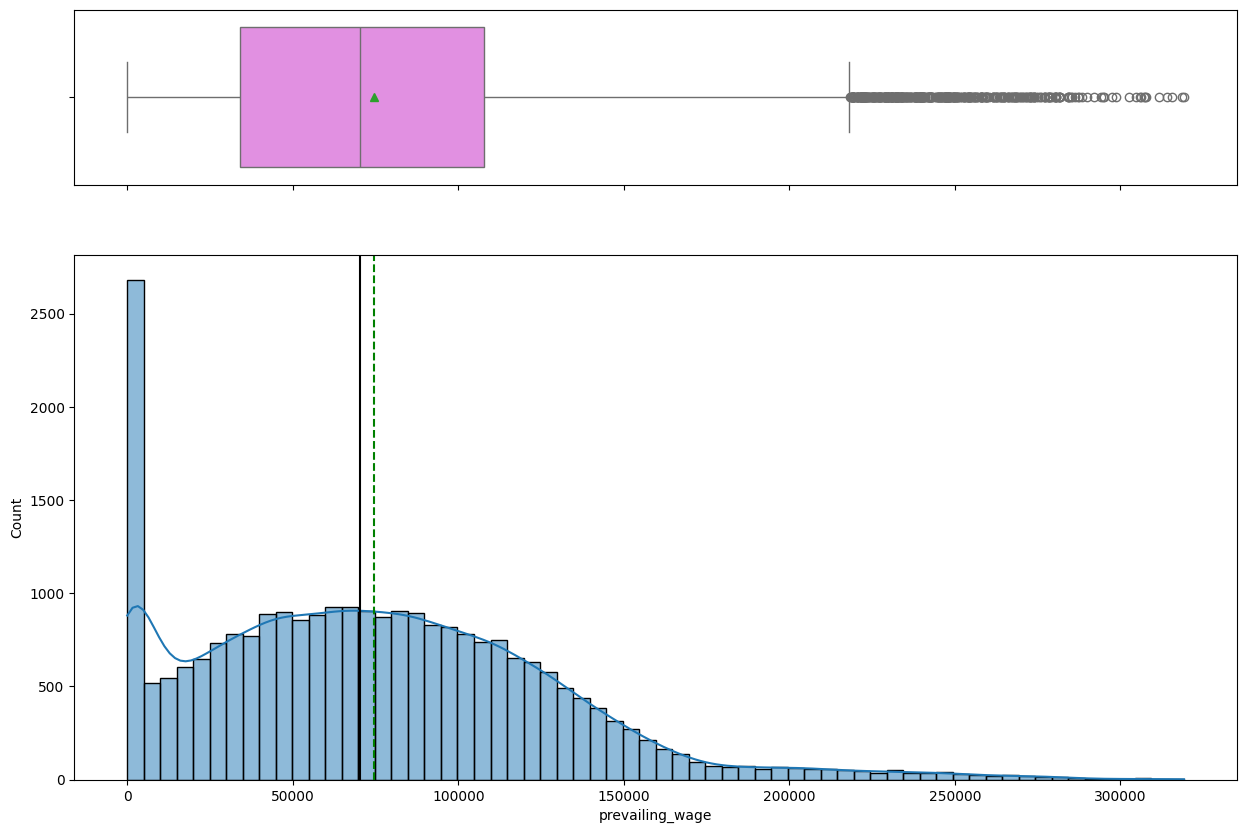

In [ ]:
# Visual on prevailing wage
histogram_boxplot(df, 'prevailing_wage')

* There is a big variation on prevailing wage. Could be due to a relation on unit of prevailing wage.
* We will explore this further with bivariate analysis.
* The mean and median are close together at around 75000.
* There are many outliers on the upper side.

#### Unit of prevailing wage

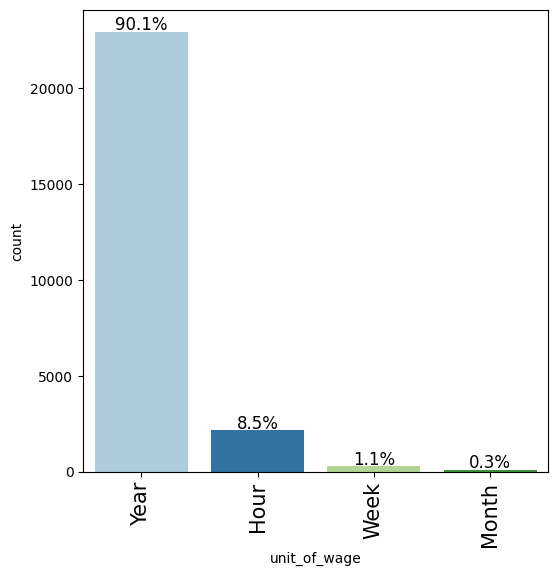

In [ ]:
labeled_barplot(df, 'unit_of_wage')

* Most of the wages are represented yearly (90.1%).
* 8.5% of the wages are hourly.
* Very few unit of wage are weekly or monthly.

#### Position of work full time (Y) or part time (N)

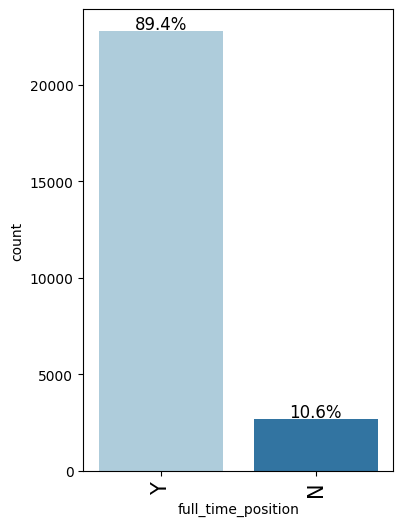

In [ ]:
labeled_barplot(df, 'full_time_position')

* ~89% of the positions are full time.

#### Certified or denied visa

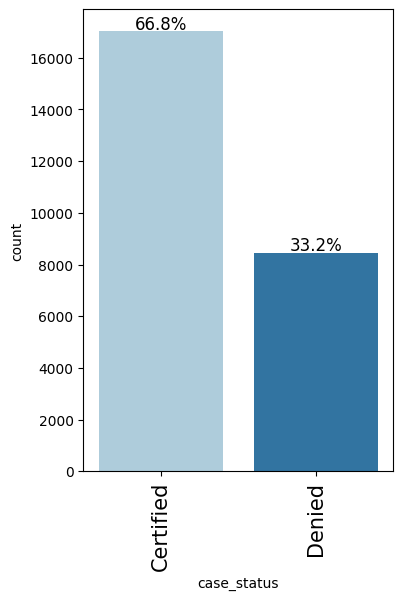

In [ ]:
labeled_barplot(df, 'case_status')

* 66.8% of the visas are approved.

### Bivariate analysis

#### Correlation check

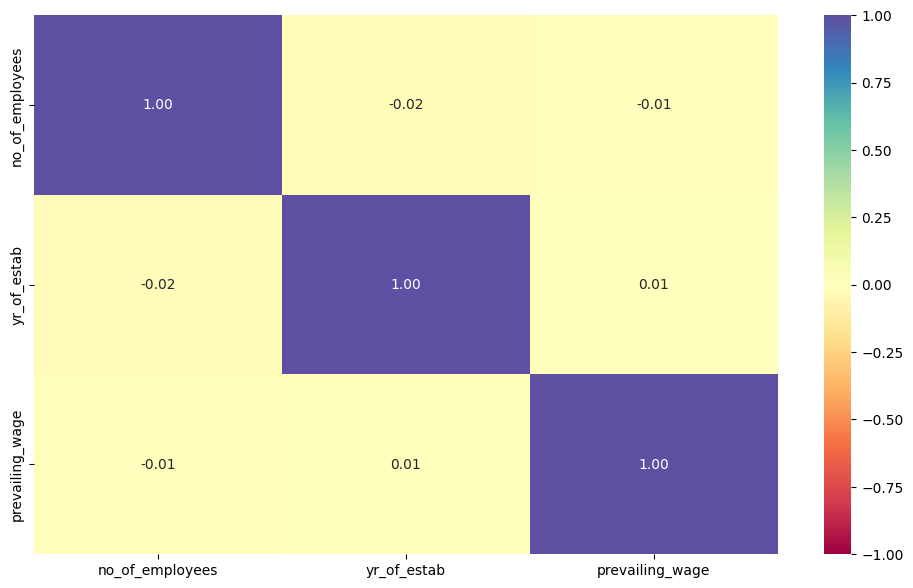

In [ ]:
# Creating a new variable with numerical columns
cols_list = df.select_dtypes(include=np.number).columns.tolist()

# Visualizing a correlation map
plt.figure(figsize=(12, 7))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral");

* There doesn't seem to be any significant correlation between numerical variables.

#### Case Status and Education level
Those with higher education may want to travel abroad for a well-paid job. Let's see if education has an impact on approval rates.

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


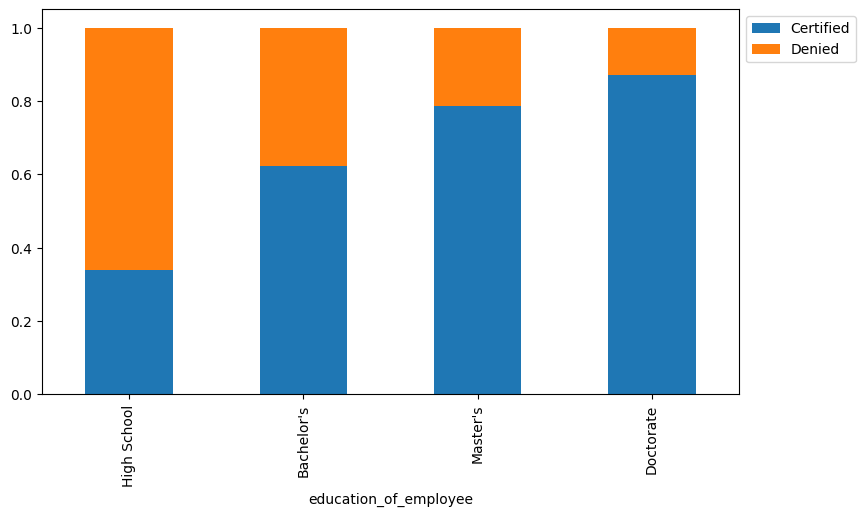

In [ ]:
# Relation between education and case status
stacked_barplot(df, 'education_of_employee', 'case_status')

* There is a relation between visa approvals and education level.
* The higher the education, more likely the approval.
* Workers with a High School degree have a 30% chance of approval.
* Workers with a Bachelor's degree or higher have at least a 65% approval rate.


#### Case status and Continent of origin
Let's check if the visa status varies across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


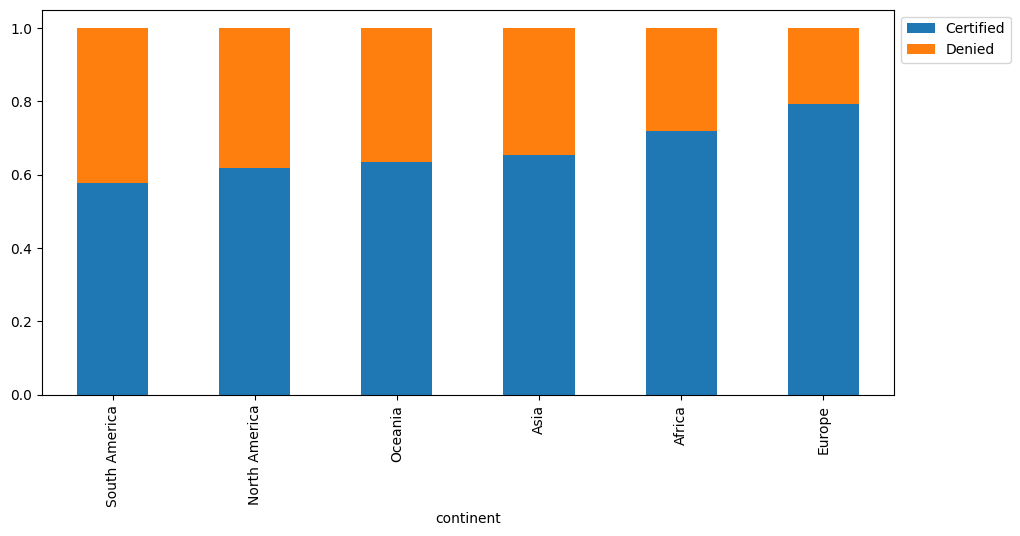

In [ ]:
# Relation between continent and case status
stacked_barplot(df, 'continent', 'case_status')

* South America has the lowest approval rate with a little below 60%.
* Europe has the highest approval rate with ~80% of the visas being certified.

#### Case status and Region
Let's see if case status also varies by region in the US. Sometimes the regions that have the least amount of request have a higher approval rate due to needing qualified workers.

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


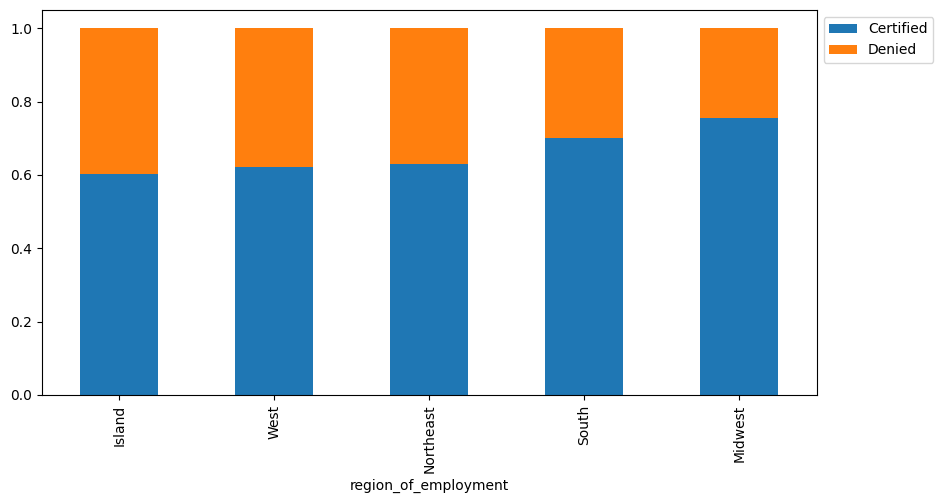

In [ ]:
stacked_barplot(df, 'region_of_employment', 'case_status')

* Midwest and Island are the regions with the least amount of visa requests. However the approval percentage is very different for these regions.
* There isn't a relation between the amount of workers intended region of employment and case status.
* Midwest and South have the highest certified rates at around 75%.
* Island and West have a 60% approval rate.

#### Region of employment and Education level
Let's see if the certified visas are related to the education of the workers.

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
region_of_employment                                                      
All                         10234       2192         3420      9634  25480
West                         2925        714          785      2162   6586
Northeast                    2874        656          905      2760   7195
South                        2991        541          934      2551   7017
Midwest                      1315        256          736      2000   4307
Island                        129         25           60       161    375
------------------------------------------------------------------------------------------------------------------------


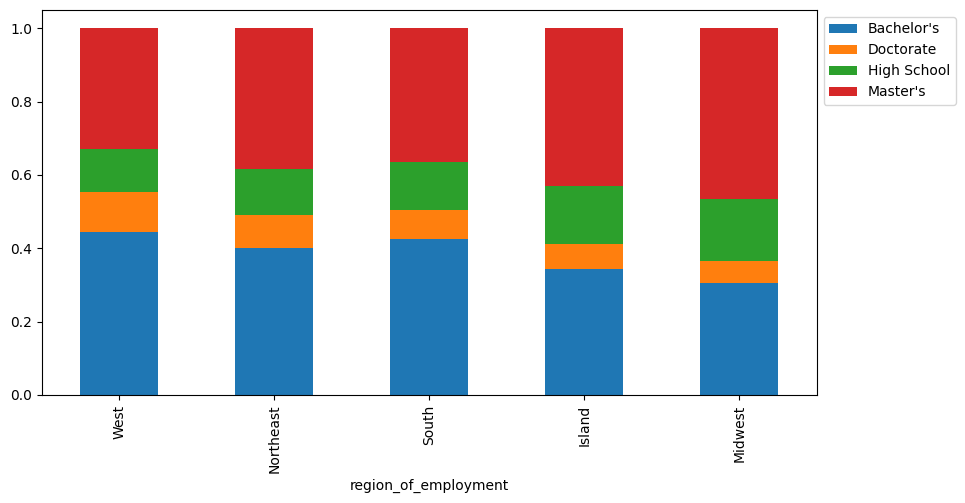

In [ ]:
# Visual on region and education level
stacked_barplot(df, 'region_of_employment', 'education_of_employee')

* Workers with the highest level of education (doctorate) request more employment in the West and Northeast.
* Most of workers with a masters request Island or Midwest. The regions with least amounts of requests.
* However, Island and Midwest also have more request of workers that only have a High School degree.
* South and West have more workers with a Bachelors.

#### Case status and Job experience
Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if work experience influences visa status.

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


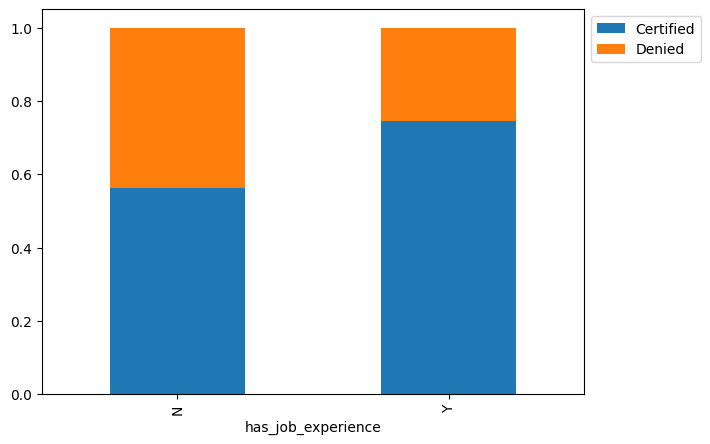

In [ ]:
# Relation between job experience and case status
stacked_barplot(df, 'has_job_experience', 'case_status')

* There is ~20% increase in certified visas for workers with job experience.

#### Case status and Unit of wage
In the United States, employees are paid at different intervals. Let's see which pay unit is most likely to be certified for a visa.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


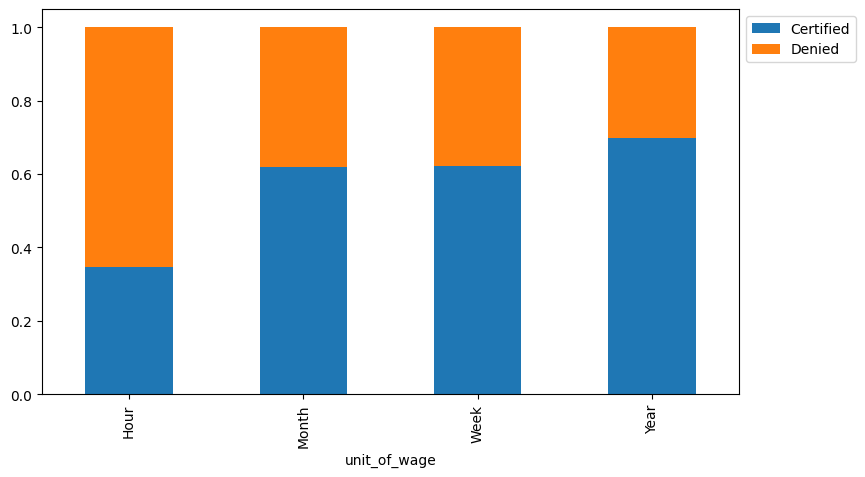

In [ ]:
# Relation between unit of wage and case status
stacked_barplot(df, 'unit_of_wage', 'case_status')

* Workers paid hourly are least likely to get certified for a visa (around 35% approval rate).
* Yearly wages are most likely to be approved with ~75%.
* Monthly and weekly wages have a similar certified rate at around 60%.

#### Case status and Prevailing wage
The US government has established a prevailing wage to protect local talent and foreign workers. Let's see if the visa status changes with the prevailing wage.

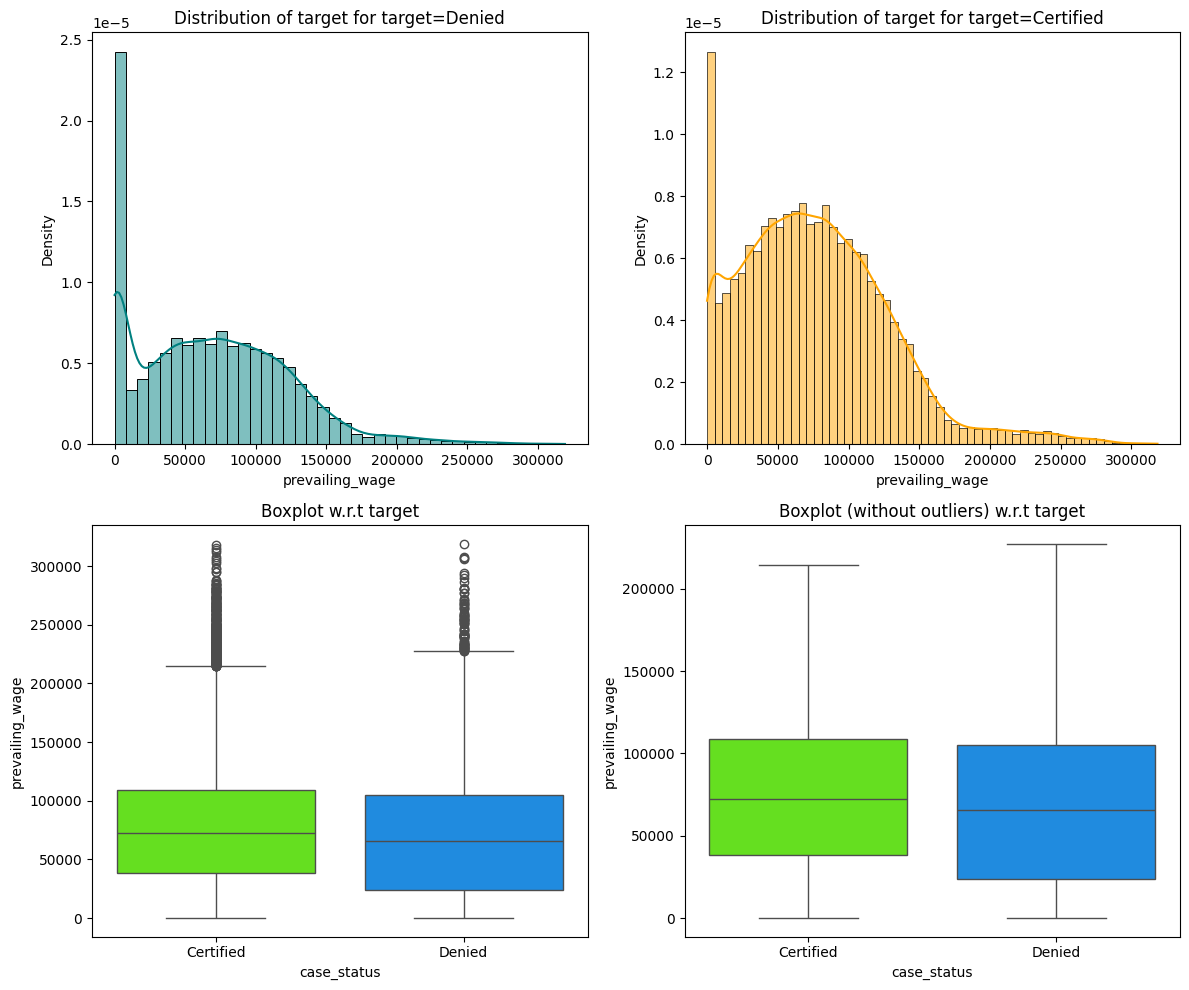

In [ ]:
# Relation between prevailing wage and case status
distribution_plot_wrt_target(df, 'prevailing_wage', 'case_status')

* There isn't much difference between certified and denied case status in relation to prevailing wage.
* Denied cases have a slightly lower median than certified.

#### Prevailing wage and Education level
Usually education level is highly correlated to wages. Let's check if that is the case.

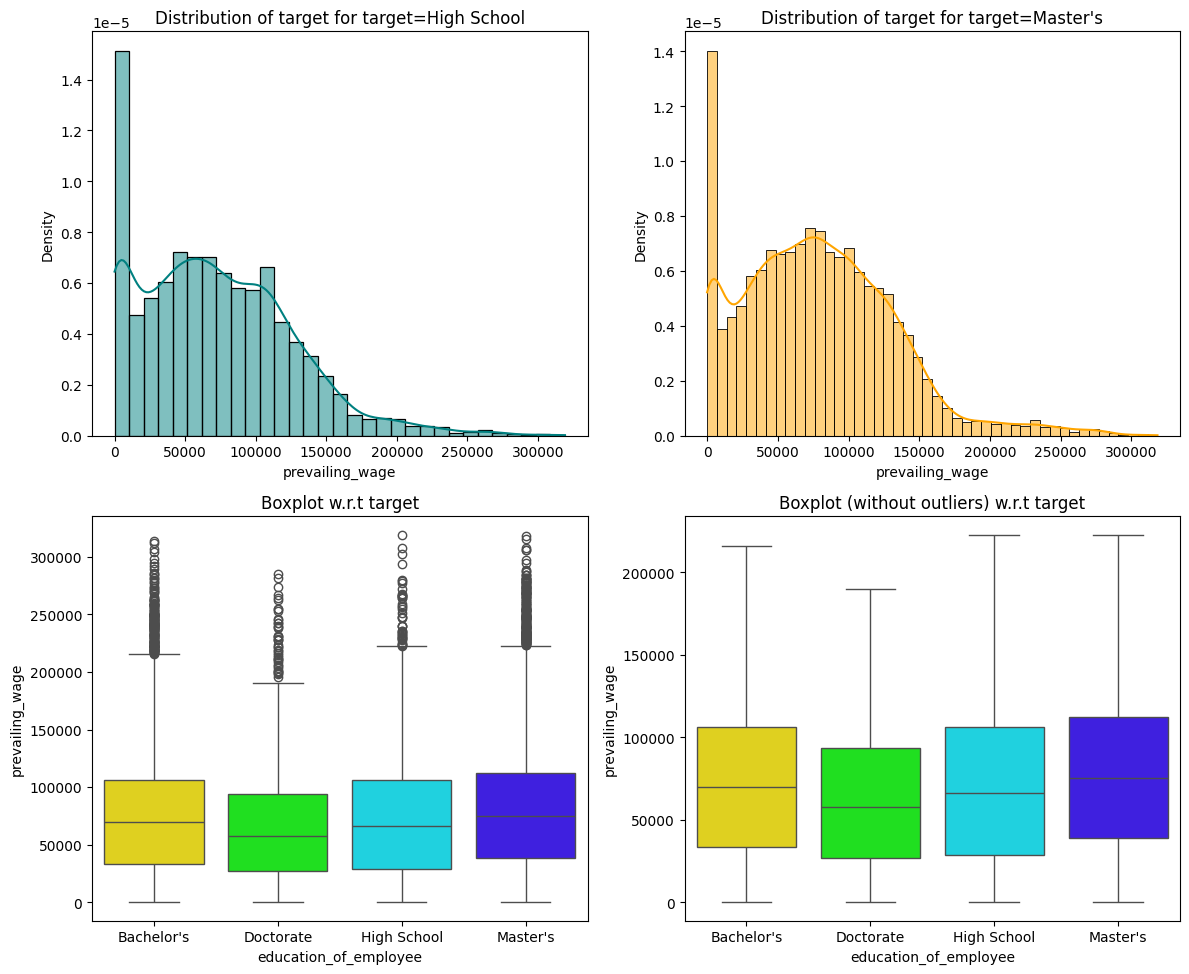

In [ ]:
# Relation between prevailing wage and education level
distribution_plot_wrt_target(df, 'prevailing_wage', 'education_of_employee')

* It is surprising that workers with a doctorate have a lower median than those with a High School degree. We will check if this is due to work experience or required job training.
* Master's and Bachelor's workers have a very similar prevailing wage.
* Workers with a High School degree have a slightly lower prevailing wage than Master's and Bachelor's.
* These dataset doesn't include certification and especialized jobs. This could influence prevailing wage for workers with a High School degree.

#### Prevailing wage and Job experience
Let's check if wage is correlated to job experience. Before adding the variable education level.

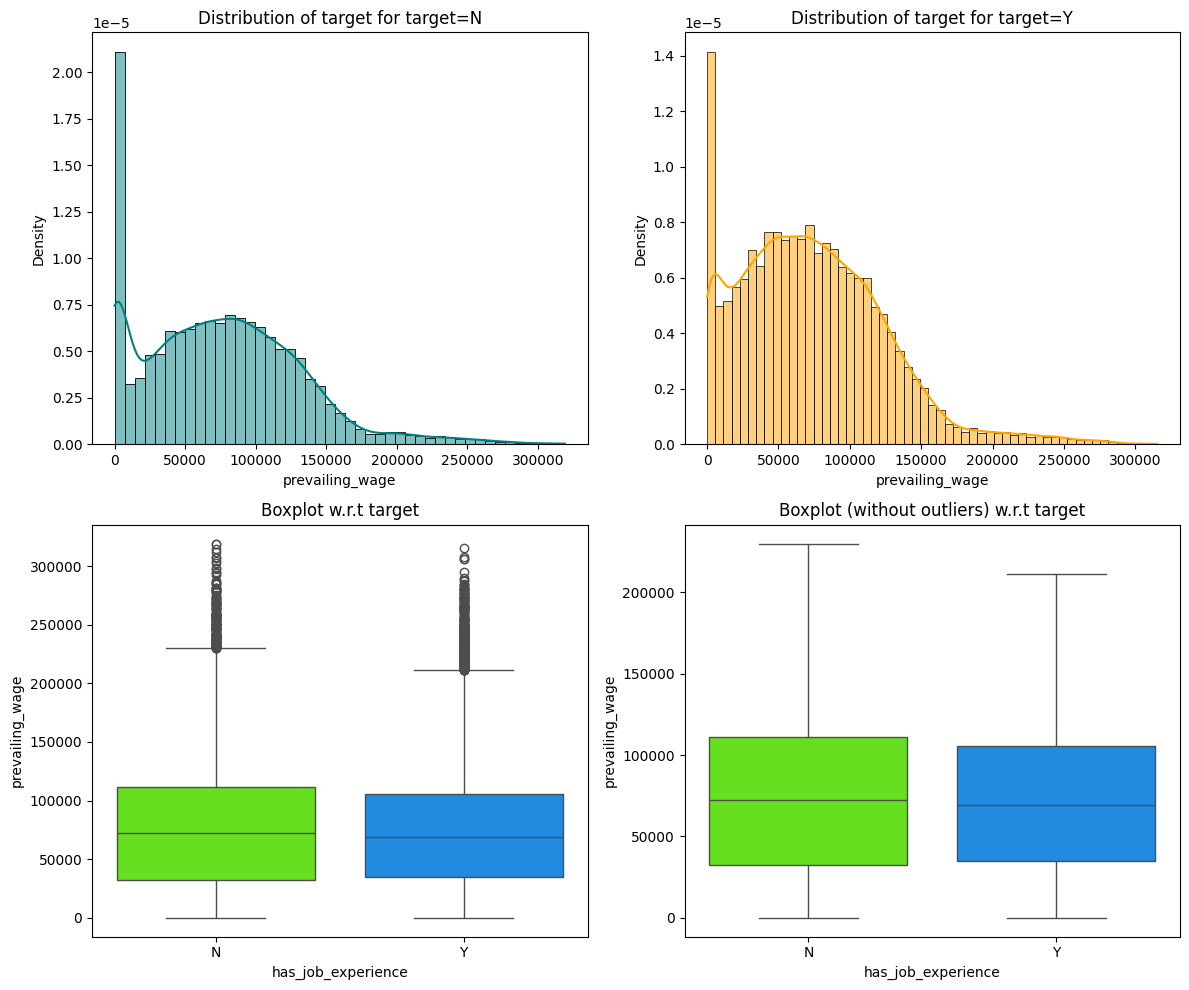

In [ ]:
# Visuals on prevailing wage and job experience
distribution_plot_wrt_target(df, 'prevailing_wage', 'has_job_experience')

* There seems to be a higher prevailing wage for workers with no work experience.
* We will check if this is also related with education level. Usually people with higher education have less work experience due to dedicating their time to education.

#### Prevailing wage and Required job training
Before comparing education level with prevailing wage and experience, let's analyze the relation between wages and training.

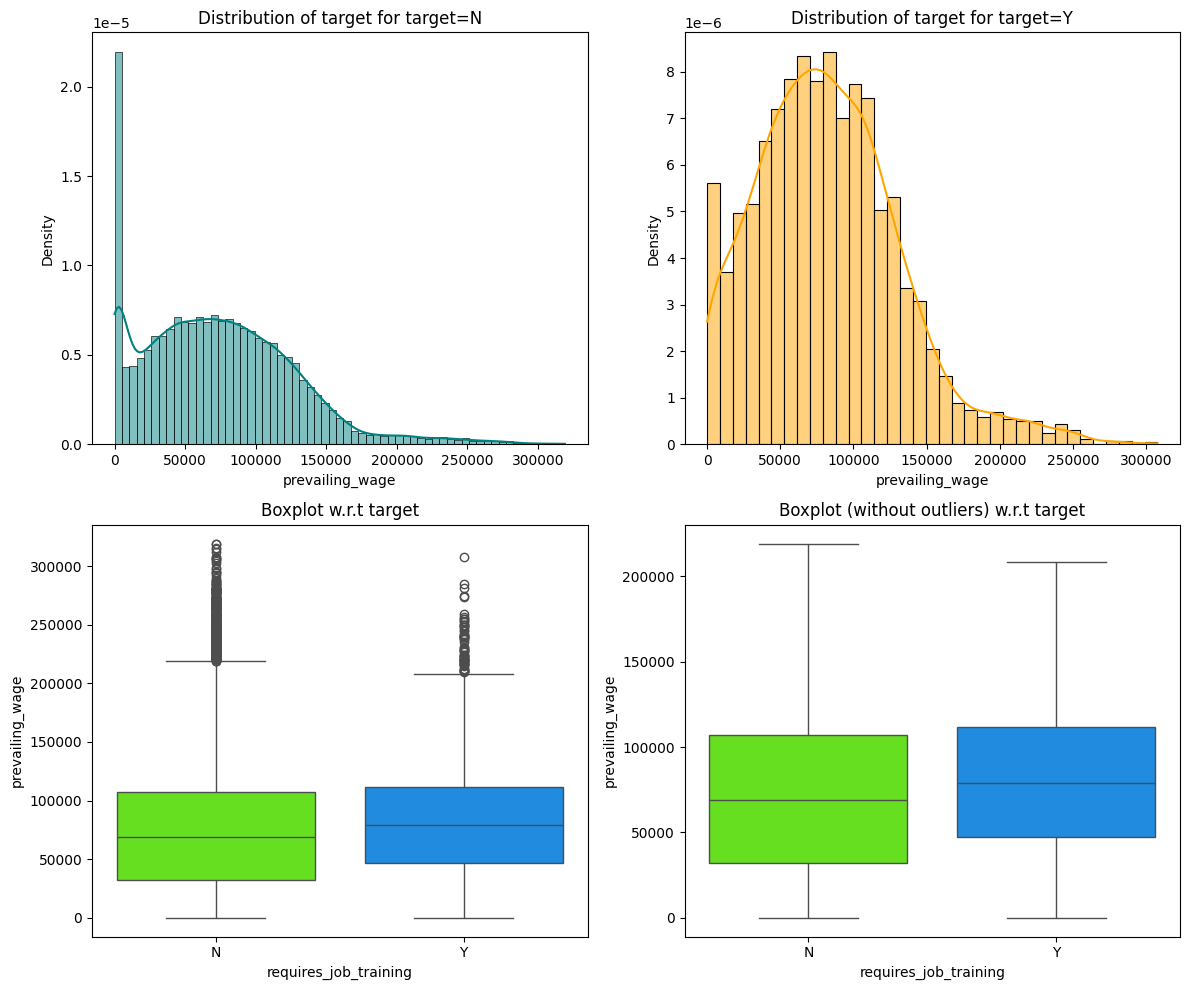

In [ ]:
# Relation between prevailing wage and job training
distribution_plot_wrt_target(df, 'prevailing_wage', 'requires_job_training')

* Workers that require job training have a slightly higher prevailing wage median.
* There are also less outliers for workers that require job training.
* This makes sense as job training especializes a worker more, having a higher value for the companies.

#### Education level, Prevailing wage, and work experience

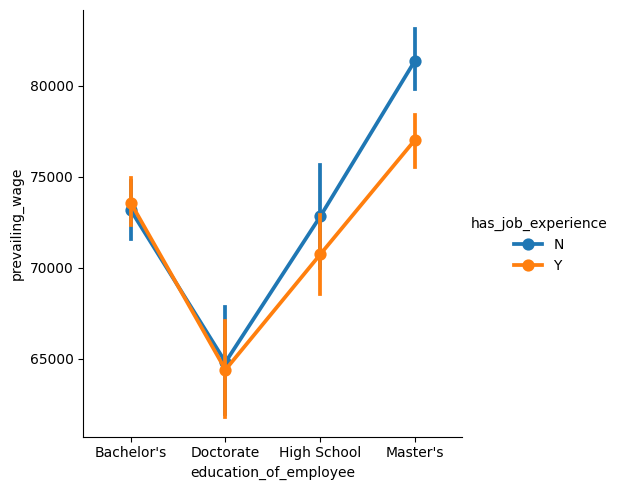

In [ ]:
# Visual of 3 variables
sns.catplot(data=df, x='education_of_employee', y='prevailing_wage', hue='has_job_experience', kind='point');

* It is very surprising that overall workers with no experience have higher wages.
* Workers with a doctorate have the lowest prevailing wages.

#### Prevailing wage and Unit of wage
Let's check if there is any reason for the big variation on prevailing wage.

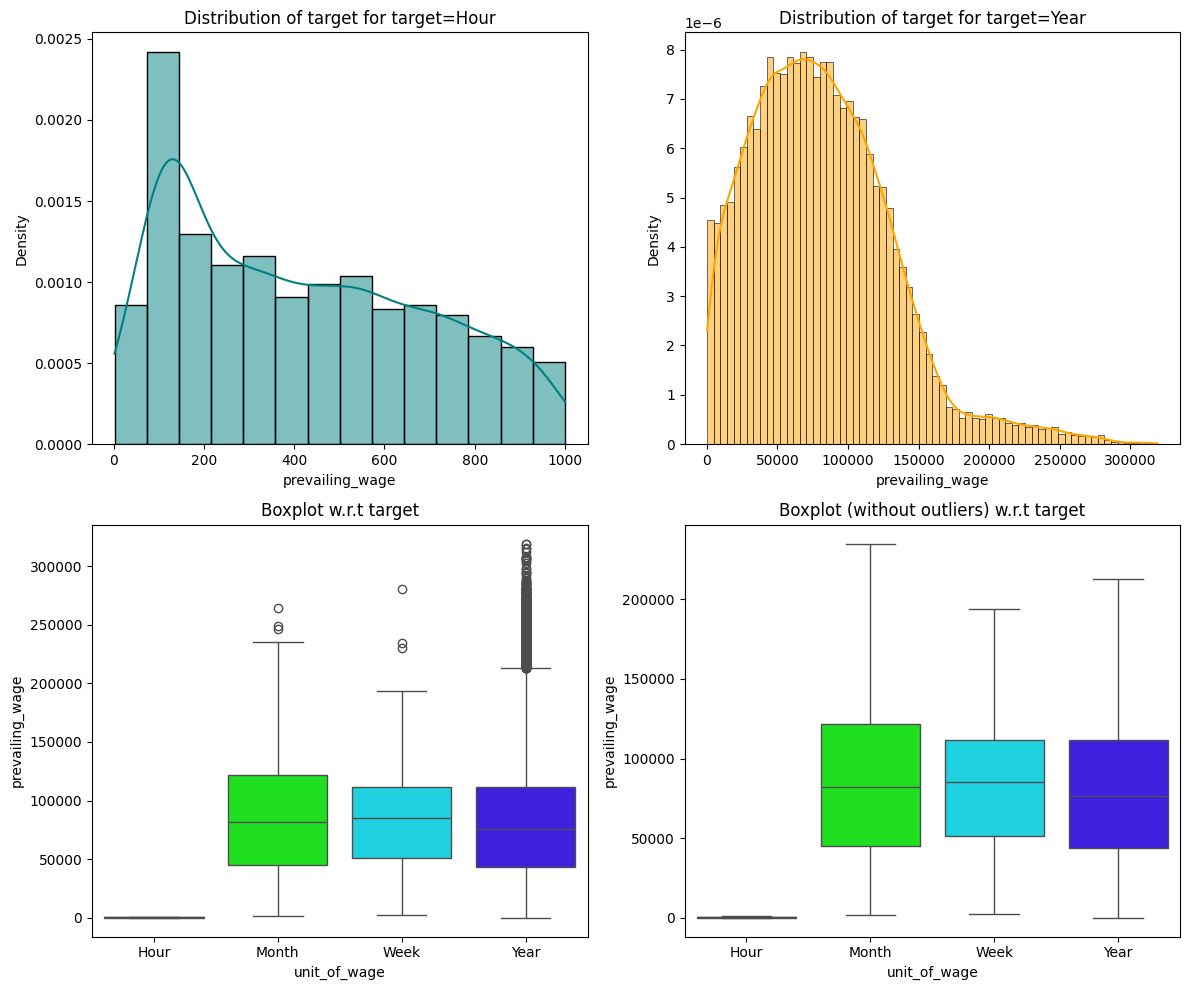

In [ ]:
# Relation between prevailing and unit of wage
distribution_plot_wrt_target(df,'prevailing_wage', 'unit_of_wage')

* It's surprising that all units of wage are close to 0.
* However, they are all above 0 which could be possible that the values are true.
* We will leave the prevailing wage as is since we don't know exactly how it was calculated. After comparing prevailing wage with other variables, it doesn't seem necessary to modify the variable.

## Data preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing value treatment

In [ ]:
# Looking if there are any missing values
df.isnull().values.any()

False

* There are no missing values in the dataset.

### Feature engineering

* Column 'case_id' has already been dropped.
* Previously, we mentioned the column prevailing wage. It isn't necassary to change this variable into a yearly wage as is varies by unit of wage. We will leave that column as is.
* Dependent variable (case_status) is of categorical type, we will change this to a binary variable.

In [ ]:
# Changing case status data type
df['case_status'] = df['case_status'].replace({'Denied': 0, 'Certified': 1})
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1


* 'case_status' has been changed from category type to a binary variable.
* Denied cases are classified as 0, and Certified are classified as 1.

In [ ]:
# Checking the highest year of establishment
df.yr_of_estab.max()

2016

In [ ]:
# Modifying the year of establishment to decrease the high numbers
df['yr_since_estab'] = 2017 - df['yr_of_estab']
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,yr_since_estab
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0,10
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1,15
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0,9
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0,120
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1,12


In [ ]:
# Dropping the column year of establishment
df.drop(['yr_of_estab'], axis=1, inplace=True)
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,yr_since_estab
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,0,10
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,1,15
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,0,9
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,0,120
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,1,12


* The column 'yr_of_estab' has been dropped correctly.
* A new column 'yr_since_estab' was added to represent the amount of years the company has been running.

### Outlier detection and treatment

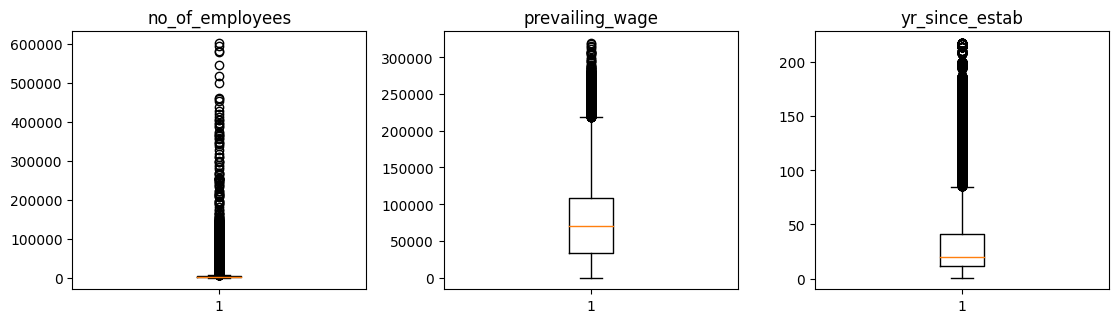

In [ ]:
# Outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are a few outliers in the data.
* We will not treat them as they are proper values.

### Preparing data for modeling

In [ ]:
# Defining X (independent) and y (dependent) variables
X = df.drop(['case_status'], axis=1)
y = df['case_status']

print(X.head())
print(y.head())

  continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  N                     N   
1      Asia              Master's                  Y                     N   
2      Asia            Bachelor's                  N                     Y   
3      Asia            Bachelor's                  N                     N   
4    Africa              Master's                  Y                     N   

   no_of_employees region_of_employment  prevailing_wage unit_of_wage  \
0            14513                 West         592.2029         Hour   
1             2412            Northeast       83425.6500         Year   
2            44444                 West      122996.8600         Year   
3               98                 West       83434.0300         Year   
4             1082                South      149907.3900         Year   

  full_time_position  yr_since_estab  
0                  Y              10  
1             

In [ ]:
# Encoding the categorical variables
X = pd.get_dummies(X, dtype=int, columns=X.select_dtypes(include=['object', 'category']).columns.tolist(), drop_first=True)
X.head()

,no_of_employees,prevailing_wage,yr_since_estab,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,...,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,14513,592.2029,10,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,2412,83425.6500,15,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
2,44444,122996.8600,9,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1
3,98,83434.0300,120,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,1082,149907.3900,12,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1


In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(17836, 21) (7644, 21)


In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
case_status
1    0.667919
0    0.332081
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.667844
0    0.332156
Name: proportion, dtype: float64


* We had seen that 66.8% of cases belong to Certified and 33.2% observations belong to denied cases. This is preserved in the train and test sets.

## Secondary EDA

* No significant changes were made to the dataset.
* Outliers are not treated and there were no missing values.
* A secondary EDA isn't necessary as data was explored and manipulated in the initial EDA.

## Model evaluation criterion

### Model can make wrong predictions as:

* Model predicted a visa to be denied but in reality the visa was certified.
* Model predicted a visa to be certified but in reality it was denied.

### Which case is more important?

* If we predict that a visa will be denied but in reality, it is certified, a more qualified US citizen will miss a job opportunity.
* If we predict that the visa will be certified but in reality, it is denied, a qualified foreign worker will miss a job opportunity.
* Both situations are equally important as they contribute to the national economy and business resources.

### How to reduce this loss?

* Due to false negatives and false positives having a high cost for the economy. We need to look at a balance metric such as F1 score.
* We'll fit different models on the train data and observe their performance.
We'll try to improve that performance by tuning some hyperparameters available for that algorithm.
* We'll use GridSearchCv for hyperparameter tuning and F1 score to optimize the model.
* We will maximize F1 score by building different models. The greater the F1-Score higher the chances of predicting both the classes correctly.

### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [ ]:
# Defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# Defining a function to plot confusion matrix

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# Defining a function to plot the confusion_matrix of a classification model using statsmodels

def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# Defining a function to compute different metrics to check performance of a classification model built using statsmodels

def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # Checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # Counding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # To compute Accuracy
    recall = recall_score(target, pred)  # To compute Recall
    precision = precision_score(target, pred)  # To compute Precision
    f1 = f1_score(target, pred)  # To compute F1-score

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

## Decision Tree - Model building and hyperparameter tuning

### Decision tree with class weights (dTree)

* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes

* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

* class_weight is a hyperparameter for the decision tree classifier

In [ ]:
# Fitting the model
dTree = DecisionTreeClassifier(random_state=1, class_weight="balanced")
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

### Decision tree (dTree) performance on training set

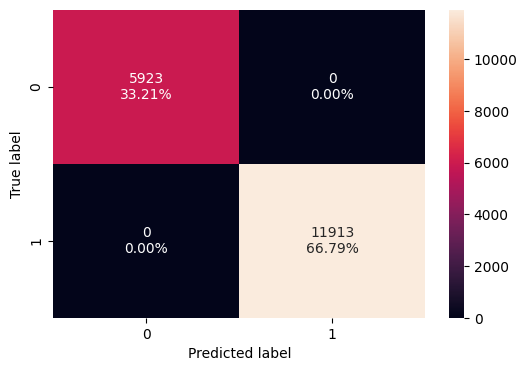

In [ ]:
# Confusion matrix for training set
confusion_matrix_statsmodels(dTree, X_train, y_train)

Interpreting a confusion matrix:
* The top left quadrant represent True Negative values. In this case, the model correctly predicted 33.21% of the visas to be denied.
* Top right quadrant represents False Positive values. The model predicted a visa to be certified when in reality it was denied. The model is overfitting as it split completely and correctly predicted no visas were incorrectly classified here.
* Bottom left quadrant is False Negatives. The model predicts a visa to be denied but it was certified.
* On the bottom right corner is True Positives. Our model correcly classifies the approved visas, which is 66.79% of the total or 11913.

A similar interpretation of the matrices for the rest of the case can be done.

In [ ]:
# Metrics for train set with class weights
dTree_train_perf = model_performance_classification_sklearn(dTree, X_train, y_train)
dTree_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


### Decision tree (dTree) performance on test set

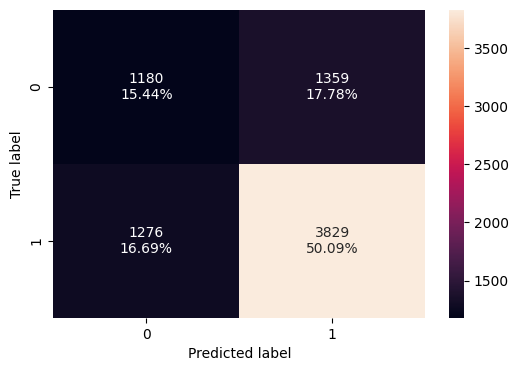

In [ ]:
# Confusion matrix for test set
confusion_matrix_statsmodels(dTree, X_test, y_test)

In [ ]:
# Metrics for test set with class weights
dTree_test_perf = model_performance_classification_sklearn(dTree, X_test, y_test)
dTree_test_perf

,Accuracy,Recall,Precision,F1
0,0.655285,0.750049,0.738049,0.744001


* The decision tree is overfitting the training data. It split fully giving pure metric scores.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter tuning for decision tree

In [ ]:
# Choose the type of classifier.
dTree_tuned = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(10, 20, 5),
    "min_samples_leaf": [3, 5],
    "max_leaf_nodes": [2, 3, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dTree_tuned, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dTree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dTree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

### Tuned decision tree (dTree_tuned) performance on training set

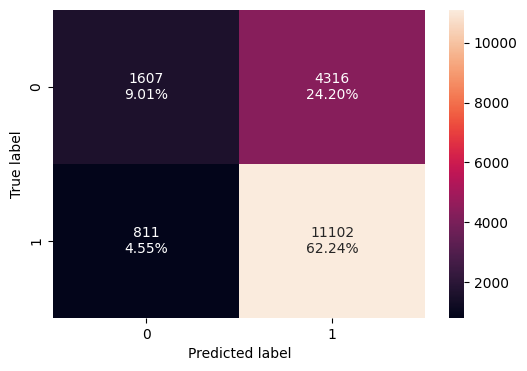

In [ ]:
# Confusion matrix for training set
confusion_matrix_sklearn(dTree_tuned, X_train, y_train)

In [ ]:
# Metrics for train set
dTree_tuned_train_perf = model_performance_classification_sklearn(dTree_tuned, X_train, y_train)
dTree_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


### Tuned decision tree (dTree_tuned) performance on test set

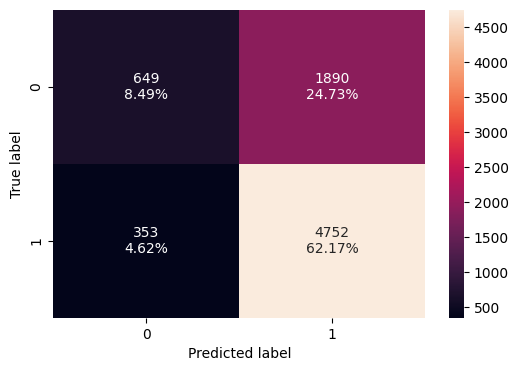

In [ ]:
# Confusion matrix for test set
confusion_matrix_sklearn(dTree_tuned, X_test, y_test)

In [ ]:
# Metrics for test set
dTree_tuned_test_perf = model_performance_classification_sklearn(dTree_tuned, X_test, y_test)
dTree_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


* The tuned model is giving a generalized result now since the f1 scores on both train and test sets are coming to be around 0.81 which shows that the model is able to generalize well on unseen data.
* Test F1 score has increased significantly compared to initial model.
* All metrics are similar for test and train sets on tuned decision tree.
* Since the tuned tree is able to generalize well, we will not perform post-pruning (cost complexity pruning), but we will try building other models.

## Logistic Regression - Model building and hyperparameter tuning

* We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

* Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

### Initial logistic regression model

In [ ]:
# Add the intercept or constant term to the data
X = sm.add_constant(X)

In [ ]:
# Fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:            case_status   No. Observations:                17836
Model:                          Logit   Df Residuals:                    17815
Method:                           MLE   Df Model:                           20
Date:                Thu, 20 Jun 2024   Pseudo R-squ.:                  0.1638
Time:                        16:52:26   Log-Likelihood:                -9480.6
converged:                       True   LL-Null:                       -11337.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
no_of_employees                   -5.013e-07   7.66e-07     -0.654      0.513      -2e-06       1e-06
prevailing_wage                    6.477e-07   3.87e-07      1

* Negative values of the coefficient show that the probability of a visa getting certified decreases with the increase of the corresponding value.
* Positive values of the coefficient show that the probability of a visa being approved increases with the increase of the corresponding value.
* p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.
* But sometimes p-values change after dropping a variable, so we'll drop them one by one using a loop.
  * Build a model, check the p-values of the variables, and drop the column with the highest p-value.
  * Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  * Repeat the above two steps till there are no columns with p-value > 0.05.

### Logistic regression (lg) performance on train set

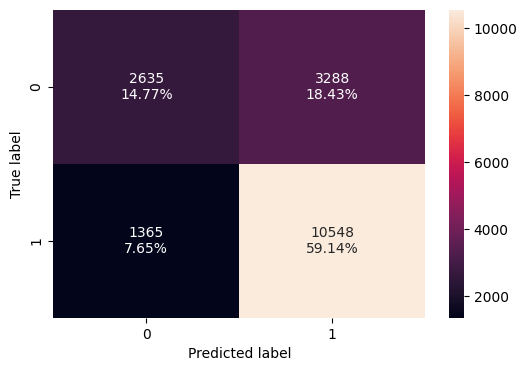

In [ ]:
# Confusion matrix for lg model
confusion_matrix_statsmodels(lg, X_train, y_train)

In [ ]:
# Metrics for lg train set
lg_train_perf = model_performance_classification_statsmodels(lg, X_train, y_train)
lg_train_perf

,Accuracy,Recall,Precision,F1
0,0.739123,0.885419,0.762359,0.819294


### Logistic regression (lg) performance on test set

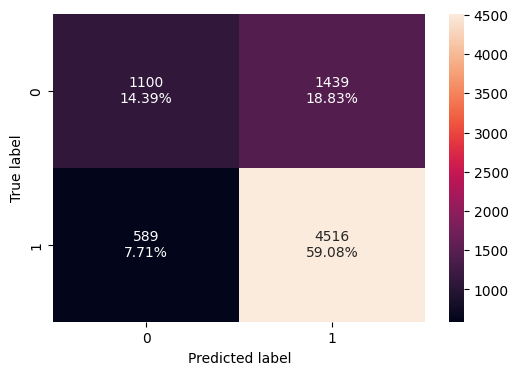

In [ ]:
# Confusion matrix for lg model
confusion_matrix_statsmodels(lg, X_test, y_test)

In [ ]:
# Metrics for lg test set
lg_test_perf = model_performance_classification_statsmodels(lg, X_test, y_test)
lg_test_perf

,Accuracy,Recall,Precision,F1
0,0.734694,0.884623,0.758354,0.816637


* Logistic regression model is able to generalize well.
* F1 score for lg model is performing slightly better than the tuned decision tree.
* Let's check for multicollinearity and high p-values to see if we can maximize metric scores for lg model.

### Checking multicollinearity
- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

There are different ways of detecting (or testing for) multicollinearity. One such way is using the Variation Inflation Factor (VIF).

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model.

* **General Rule of thumb**:
  - If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence  the variance of $\beta_k$ is not inflated at all
  - If VIF exceeds 5, we say there is moderate multicollinearity
  - If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

* The purpose of the analysis should dictate which threshold to use

In [ ]:
# Checking the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

no_of_employees                       1.064166
prevailing_wage                       3.930517
yr_since_estab                        1.778440
continent_Asia                       20.875149
continent_Europe                      5.649939
continent_North America               4.632896
continent_Oceania                     1.211995
continent_South America               2.012082
education_of_employee_Doctorate       1.279096
education_of_employee_High School     1.340196
education_of_employee_Master's        1.978594
has_job_experience_Y                  2.502251
requires_job_training_Y               1.219135
region_of_employment_Midwest          6.972981
region_of_employment_Northeast       10.508732
region_of_employment_South           10.452626
region_of_employment_West            10.009105
unit_of_wage_Month                    1.058904
unit_of_wage_Week                     1.164612
unit_of_wage_Year                    14.214152
full_time_position_Y                  9.534255

* We ignore the VIF for dummy variables and the intercept.
* We observe that there is no multicollinearity present in the data.
* Hence, The values of coefficient and p-values are reliable.
* Let's remove the insignificant variables (p-value > 0.05) from data.

### Removing insignificant variables (p-value > 0.05)

In [ ]:
# Initial list of columns
cols = X_train.columns.tolist()

# Setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # Defining the train set
    x_train_aux = X_train[cols]

    # Fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # Getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # Name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['continent_Asia', 'continent_North America', 'continent_Oceania', 'continent_South America', 'education_of_employee_Doctorate', 'education_of_employee_High School', "education_of_employee_Master's", 'has_job_experience_Y', 'requires_job_training_Y', 'region_of_employment_Midwest', 'region_of_employment_Northeast', 'region_of_employment_West', 'unit_of_wage_Month', 'unit_of_wage_Week', 'unit_of_wage_Year']


In [ ]:
# Creating new variables without high p-values
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

###Default logistic regression model (no multicollinearity or high p-values)

In [ ]:
# Building a new model without high p-values
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:            case_status   No. Observations:                17836
Model:                          Logit   Df Residuals:                    17821
Method:                           MLE   Df Model:                           14
Date:                Thu, 20 Jun 2024   Pseudo R-squ.:                  0.1636
Time:                        16:52:29   Log-Likelihood:                -9482.8
converged:                       True   LL-Null:                       -11337.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
continent_Asia                       -0.7594      0.045    -16.921      0.000      -0.847      -0.671
continent_North America              -0.9166      0.062    -14

* Now, no variable has p-value greater than 0.05. We consider lg1 as the final logistic regression model and the features on X_train1 as final ones.

### Coefficient interpretation from default model (lg1)

* Coefficients of education of employee doctorate and master's, has job experience, requires job training, region of employment Midwest, and units of wages are positive. An increase in these will lead to a higher chance of a visa getting certified.
* Continent of origin Asia, North America, South America, and Oceania, and High School degree workers have high negative coefficients. An increase in these will lead to a higher chance of a visa being denied.

### Default logistic regression (lg1) performance on train set

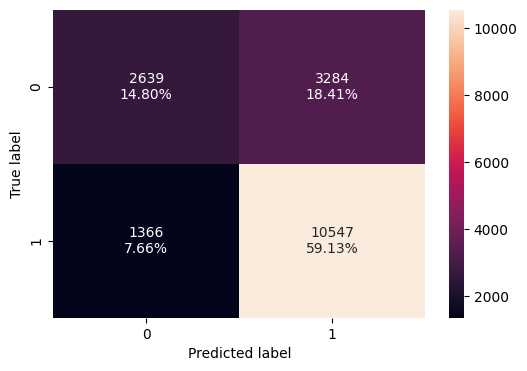

In [ ]:
# Confusion matrix for lg1 model
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [ ]:
# Metrics for lg1 train set
lg1_train_perf = model_performance_classification_statsmodels(lg1, X_train1, y_train)
lg1_train_perf

,Accuracy,Recall,Precision,F1
0,0.739291,0.885335,0.762562,0.819375


### Default logistic regression (lg1) performance on test set

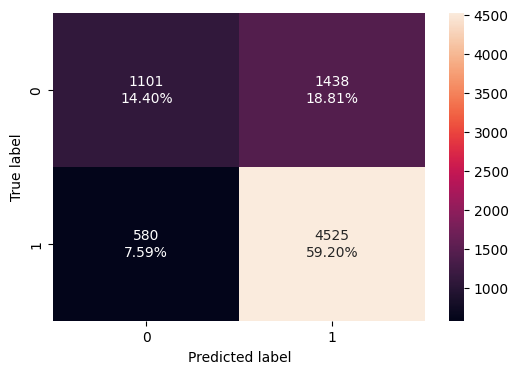

In [ ]:
# Confusion matrix for lg1 model
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [ ]:
# Metrics for lg test set
lg1_test_perf = model_performance_classification_statsmodels(lg1, X_test1, y_test)
lg1_test_perf

,Accuracy,Recall,Precision,F1
0,0.736002,0.886386,0.758846,0.817673


* Model is able to generalize well, it isn't overfitting the data as the metrics for train and test sets are similar.
* Model performance didn't improve significantly as compared to initial model.
* However, all metrics are slightly higher in test set as compared to initial model.
* We won't try to improve F1 score further by changing thresholds as the model is performing well and better than decision tree.

## Bagging - Model building and hyperparamenter tuning

### Default bagging model building (bagging)
* First we will build the bagging model with default parameters.

In [ ]:
# Fitting the model
bagging = BaggingClassifier(random_state = 1)
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=1)

### Default bagging model (bagging) performance on train set

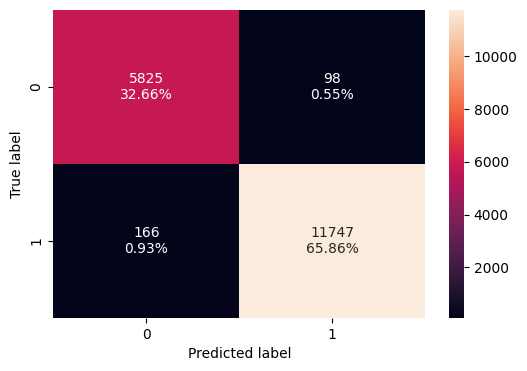

In [ ]:
confusion_matrix_sklearn(bagging, X_train, y_train)

In [ ]:
# Calculating metrics
bagging_train_perf = model_performance_classification_sklearn(bagging, X_train, y_train)
bagging_train_perf

,Accuracy,Recall,Precision,F1
0,0.985198,0.986066,0.991726,0.988888


### Default bagging model (bagging) performance on test set

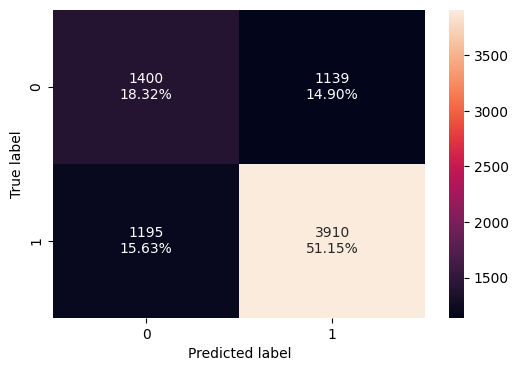

In [ ]:
# Confusion matrix for bagging test set
confusion_matrix_sklearn(bagging, X_test, y_test)

In [ ]:
# Metrics for baggging test set
bagging_test_perf = model_performance_classification_sklearn(bagging, X_test, y_test)
bagging_test_perf

,Accuracy,Recall,Precision,F1
0,0.694662,0.765916,0.774411,0.77014


* Bagging classifier is overfitting the data.
* Let's see if we can improve the metrics with hypertuning.

### Hyperparameter tuning for bagging classifier

In [ ]:
# Choose the type of classifier.
bagging_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=70,
                  random_state=1)

### Tuned bagging classifier (bagging_tuned) performance on training set

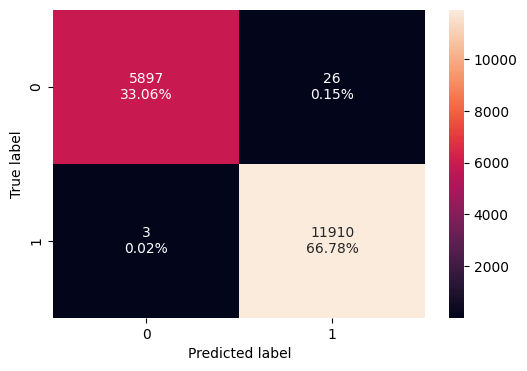

In [ ]:
# Confusion matrix
confusion_matrix_sklearn(bagging_tuned, X_train, y_train)

In [ ]:
# Metrics for tuned bagging model
bagging_tuned_train_perf = model_performance_classification_sklearn(bagging_tuned, X_train, y_train)
bagging_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.998374,0.999748,0.997822,0.998784


### Tuned bagging classifier (bagging_tuned) performance on test set

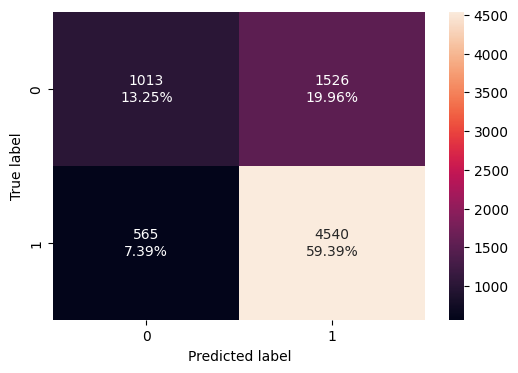

In [ ]:
# Confusion matrix
confusion_matrix_sklearn(bagging_tuned, X_test, y_test)

In [ ]:
# Metrics for tuned bagging model
bagging_tuned_test_perf = model_performance_classification_sklearn(bagging_tuned, X_test, y_test)
bagging_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.726452,0.889324,0.748434,0.812819


* Metrics have improved slightly for test set.
* Model is still overfitting the data, as train metrics are much higher than test.
* Model is not able to generalize well, so we will try a different estimator.

### Bagging classifier with logistic regression as base estimator (bagging_lr)
* Now, let's try and change the base_estimator of the bagging classifier, which is a decision tree by default.
* We will pass the logistic regression as the base estimator for bagging classifier.

In [ ]:
# Fitting the model
bagging_lr = BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear', random_state=1),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

### Bagging with logistic regression (bagging_lr) performance on training set

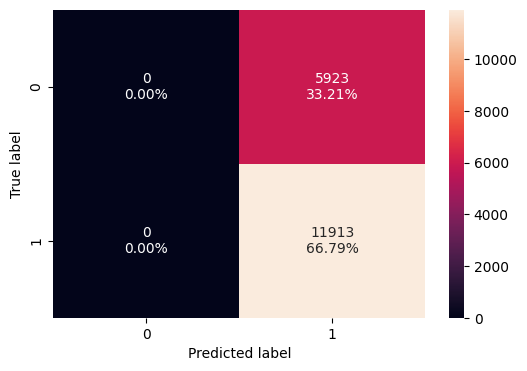

In [ ]:
# Confusion matrix
confusion_matrix_sklearn(bagging_lr, X_train, y_train)

In [ ]:
# Metrics for bagging lr
bagging_lr_train_perf = model_performance_classification_sklearn(bagging_lr, X_train, y_train)
bagging_lr_train_perf

,Accuracy,Recall,Precision,F1
0,0.667919,1.0,0.667919,0.800901


### Bagging with logistic regression (bagging_lr) performance on test set

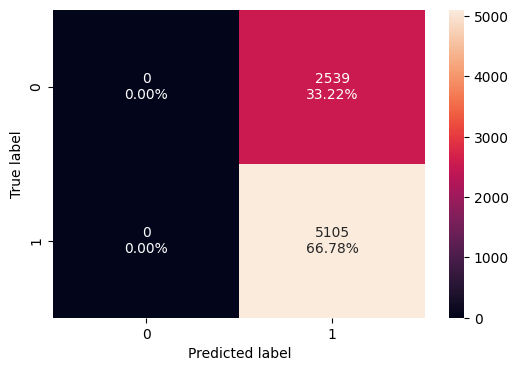

In [ ]:
# Confusion matrix
confusion_matrix_sklearn(bagging_lr, X_test, y_test)

In [ ]:
# Metrics for bagging lr
bagging_lr_test_perf = model_performance_classification_sklearn(bagging_lr, X_test, y_test)
bagging_lr_test_perf

,Accuracy,Recall,Precision,F1
0,0.667844,1.0,0.667844,0.800847


* Model is able to generalize well, train and test scores are similar for bagging classifier with logistic regression.
* Accuracy and Precision are low, but F1 score improved compared to the previous model.
* F1 score is similar as tuned logistic regression model.

## Random Forest - Model building and hyperparamenter tuning

### Random forest model (rf)

In [ ]:
# Fitting the model
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

### Random forest (rf) performance on training set

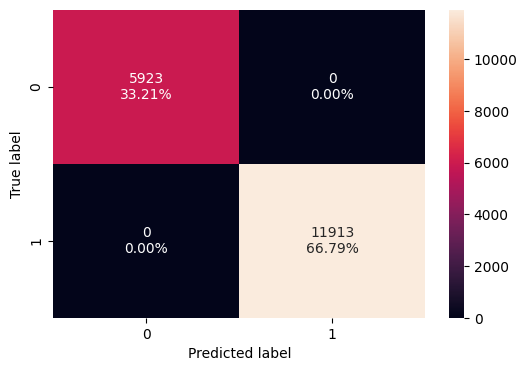

In [ ]:
# Confusion matrix
confusion_matrix_sklearn(rf, X_train, y_train)

In [ ]:
# Metrics for random forest
rf_train_perf = model_performance_classification_sklearn(rf, X_train, y_train)
rf_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


### Random forest (rf) performance on test set

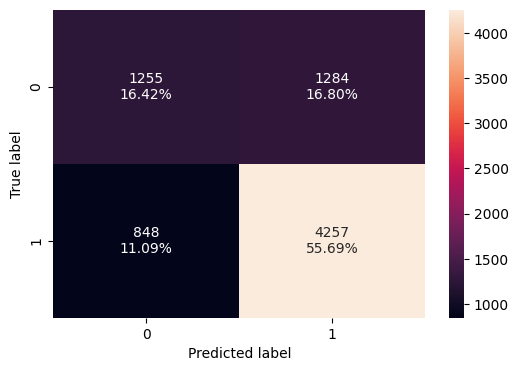

In [ ]:
# Confusion matrix for test on random forest
confusion_matrix_sklearn(rf, X_test, y_test)

In [ ]:
# Metrics for random forest test set
rf_test_perf = model_performance_classification_sklearn(rf, X_test, y_test)
rf_test_perf

,Accuracy,Recall,Precision,F1
0,0.721088,0.833888,0.768273,0.799737


* Random forest is overfitting the training data as there is a huge difference between training and test scores for all the metrics.
* Test f1 score has not imrpoved as compared to previous models.

### Tuning random forest (rf_tuned)

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1)

parameters = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.4, min_samples_leaf=3, n_estimators=110,
                       random_state=1)

### Tuned random forest (rf_tuned) performance on training set

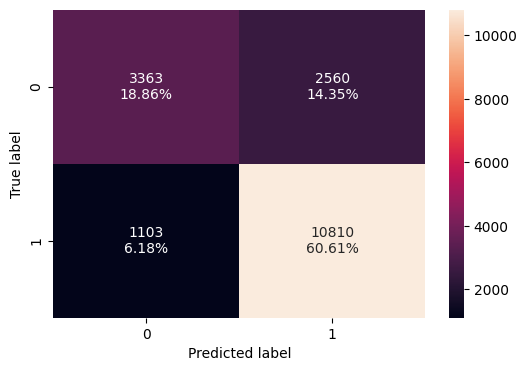

In [ ]:
# Confusion matrix
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [ ]:
# Metrics for rf tuned
rf_tuned_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
rf_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.794629,0.907412,0.808527,0.85512


### Tuned random forest (rf_tuned) performance on test set

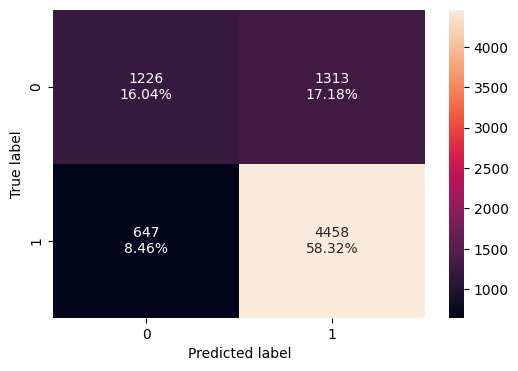

In [ ]:
# Confusion matrix for test on rf tuned
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [ ]:
rf_tuned_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test)
rf_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.74359,0.873262,0.772483,0.819787


* Model is performing well on train and test sets.
* Metrics are similar to tuned logistic regression model.

## Boosting - Model building and hyperparameter tuning
* We will build 3 ensemble methods here: AdaBoost Classifier, Gradient Boosting, and XGBoost.

### AdaBoost Classifier (ab)

In [ ]:
# Fitting the model
ab = AdaBoostClassifier(random_state=1)
ab.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

### AdaBoost (ab) performance on training set

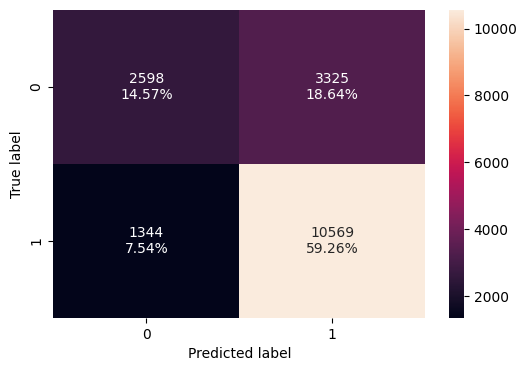

In [ ]:
# Printing the confusion matrix
confusion_matrix_sklearn(ab, X_train, y_train)

In [ ]:
# Looking at the metrics
ab_train_perf = model_performance_classification_sklearn(ab, X_train, y_train)
ab_train_perf

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


### AdaBoost (ab) performance on test set

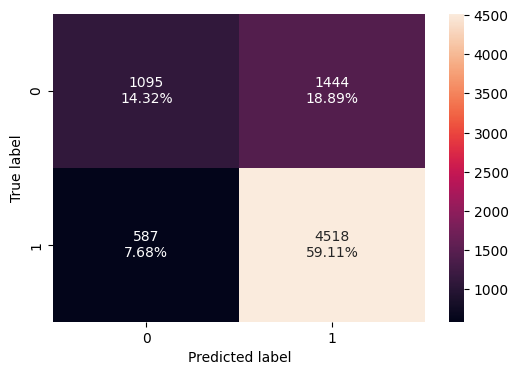

In [ ]:
# Confusion matrix on test set
confusion_matrix_sklearn(ab, X_test, y_test)

In [ ]:
# Looking at the metrics on test set
ab_test_perf = model_performance_classification_sklearn(ab, X_test, y_test)
ab_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


* Model is able to generalize well on the data. Metrics for train and test set are very similar.
* Scores are almost equal as logistic regression model 1.
* Let's try to improve this scores further with tuning.

### Hyperparameter tuning for AdaBoost (ab_tuned)
* An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
* The hyperparamters that we will use are:
  * base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
  * n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
  * learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

In [ ]:
# Choose the type of classifier
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "base_estimator":[DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,25),
    "learning_rate":np.arange(0.01,1,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ab_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.11, n_estimators=60, random_state=1)

### Tuned AdaBoost (ab_tuned) performance on training set

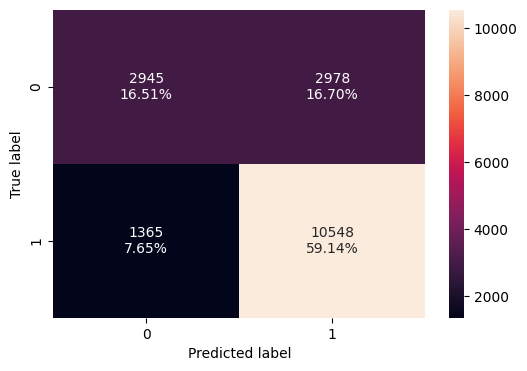

In [ ]:
# Printing the confusion matrix
confusion_matrix_sklearn(ab_tuned, X_train, y_train)

In [ ]:
# Looking at the metric scores
ab_tuned_train_perf = model_performance_classification_sklearn(ab_tuned, X_train, y_train)
ab_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.756504,0.885419,0.779831,0.829278


### Tuned AdaBoost (ab_tuned) performance on test set

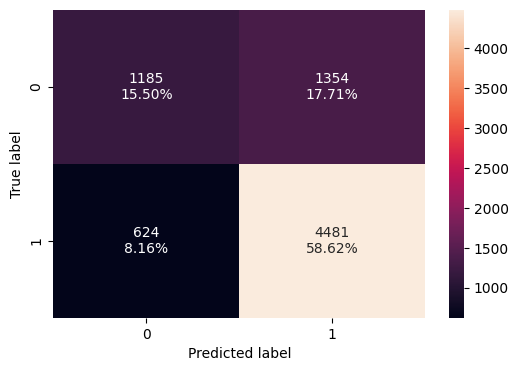

In [ ]:
# Printing the confusion matrix
confusion_matrix_sklearn(ab_tuned, X_test, y_test)

In [ ]:
# Looking at the metric scores
ab_tuned_test_perf = model_performance_classification_sklearn(ab_tuned, X_test, y_test)
ab_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.741235,0.877767,0.767952,0.819196


* Tuned AdaBoost classifier is performing slightly better on accuracy and precision.
* There is no significant improvement as compared to default AdaBoost model.
* Let's try a different boosting method.

### Gradient Boosting classifier (gb)

In [ ]:
# Fitting the model
gb = GradientBoostingClassifier(random_state=1)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

### Gradient Boosting (gb) performance on training set

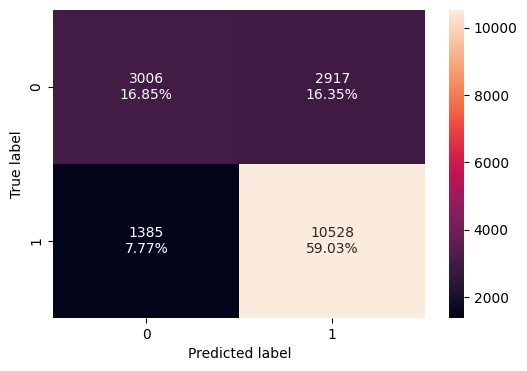

In [ ]:
# Plotting the confusion matrix
confusion_matrix_sklearn(gb, X_train, y_train)

In [ ]:
# Printing the metrics
gb_train_perf = model_performance_classification_sklearn(gb, X_train, y_train)
gb_train_perf

,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


### Gradient Boosting (gb) performance on test set

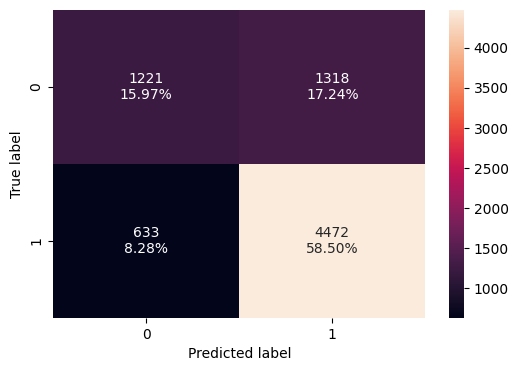

In [ ]:
# Confusion matrix on test set
confusion_matrix_sklearn(gb, X_test, y_test)

In [ ]:
# printing the metrics
gb_test_perf = model_performance_classification_sklearn(gb, X_test, y_test)
gb_test_perf

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


* Gradient Boosting classifier is performing well and not overfitting.

### Hyperparameter tuning Gradient Boosting (gb_tuned)
- Most of the hyperparameters available are same as random forest classifier.
- init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.
* We will use AdaBoost classifier as the estimator for initial predictions.

In [ ]:
# Choose the type of classifier
gb_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1), random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50, 110, 25),
    "learning_rate": [0.01, 0.1, 0.05],
    "subsample":[0.7, 0.9],
    "max_features":[0.5, 0.7, 1],
}
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.7)

### Tuned gradient boosting (gb_tuned) performance on training set

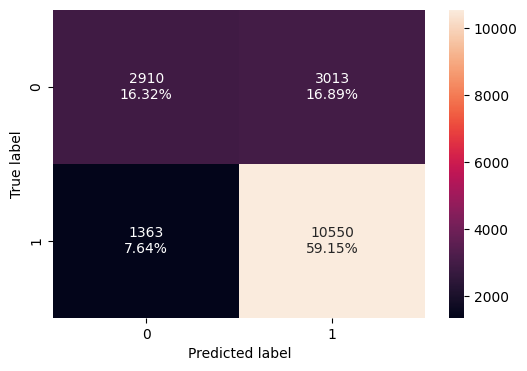

In [ ]:
# Plotting the confusion matrix
confusion_matrix_sklearn(gb_tuned, X_train, y_train)

In [ ]:
# Checking the metric scores
gb_tuned_train_perf = model_performance_classification_sklearn(gb_tuned, X_train, y_train)
gb_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.754654,0.885587,0.777852,0.82823


### Tuned gradient boosting (gb_tuned) performance on test set

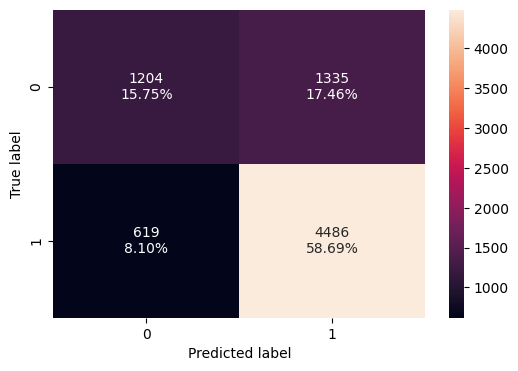

In [ ]:
# Confusion matrix
confusion_matrix_sklearn(gb_tuned, X_test, y_test)

In [ ]:
# Checking the metrics
gb_tuned_test_perf = model_performance_classification_sklearn(gb_tuned, X_test, y_test)
gb_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.744375,0.878746,0.770658,0.821161


* There is no improvement as compared to default Gradient Boosting classifier.

### XGBoost Classifier (xgb)

In [ ]:
# Fitting the model
xgb = XGBClassifier(random_state=1, eval_metric='logloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

### XGBoost (xgb) performance on training set

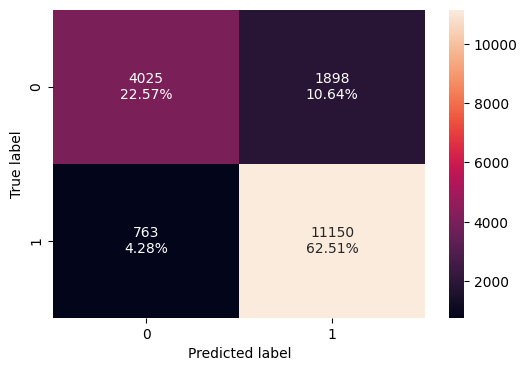

In [ ]:
# Printing the confusion matrix
confusion_matrix_sklearn(xgb, X_train, y_train)

In [ ]:
# Looking at the metrics for XGBoost on training set
xgb_train_perf = model_performance_classification_sklearn(xgb, X_train, y_train)
xgb_train_perf

,Accuracy,Recall,Precision,F1
0,0.850807,0.935952,0.854537,0.893394


### XGBoost (xgb) performance on test set

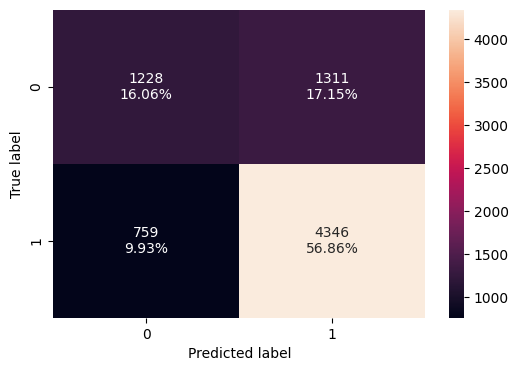

In [ ]:
# Confusion matrix
confusion_matrix_sklearn(xgb, X_test, y_test)

In [ ]:
# Checking the metrics
xgb_test_perf = model_performance_classification_sklearn(xgb, X_test, y_test)
xgb_test_perf

,Accuracy,Recall,Precision,F1
0,0.729199,0.851322,0.768252,0.807657


* XGBoost with default parameters is overfitting the data.
* We'll try hyperparameter tuning to see if the model performance improves.

### Hyperparameter tuning XGBoost (xgb_tuned)
Here are some of the parameters that we will modify:
- scale_pos_weight:Control the balance of positive and negative weights, useful for unbalanced classes. It has range from 0 to $\infty$.
- subsample: Corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.
- colsample_bytree: Corresponds to the fraction of features (the columns) to use.
- colsample_bylevel: The subsample ratio of columns for each level. Columns are subsampled from the set of columns chosen for the current tree.
- colsample_bynode: The subsample ratio of columns for each node (split). Columns are subsampled from the set of columns chosen for the current level.
- max_depth: is the maximum number of nodes allowed from the root to the farthest leaf of a tree.
- learning_rate/eta: Makes the model more robust by shrinking the weights on each step.
- gamma: A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.

In [ ]:
# Choose the type of classifier
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    'n_estimators':np.arange(50,110,25),
    'scale_pos_weight':[1,2,5],
    'learning_rate':[0.01,0.1,0.05],
    'gamma':[1,3],
    'subsample':[0.7,0.9]
  }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

### Tuned XGBoost (xgb_tuned) performance on training set

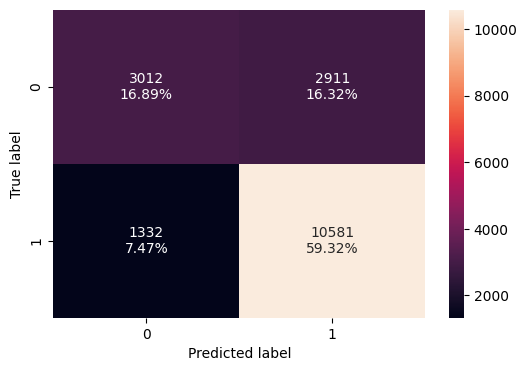

In [ ]:
# Printing the confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

In [ ]:
# Checking the metrics
xgb_tuned_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, y_train)
xgb_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.76211,0.888189,0.784243,0.832986


### Tuned XGBoost (xgb_tuned) performance on test set

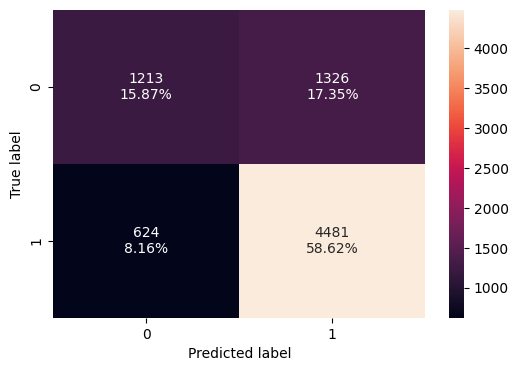

In [ ]:
# Confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [ ]:
# Checking the metrics on test set
xgb_tuned_test_perf = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
xgb_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.744898,0.877767,0.771655,0.821298


* Model is performing well and is not overfitting as compared to default XGBoost model.
* Model is performing better than previously built models.

## Stacking - Model building

Now, we will build a stacking model with the tuned models - Tuned decision tree (dTree), tuned AdaBoost classifier (ab_tuned), and tuned Gradient Boosting (gb_tuned), then use XGBoost tuned to get the final prediction.

In [ ]:
estimators = [('Decision Tree', dTree_tuned), ('AdaBoost', ab_tuned), ('Gradient Boosting', gb_tuned)]
final_estimator = xgb_tuned

# Defining stacking classifier
stacking = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv='prefit')

In [ ]:
# Fit the model
stacking.fit(X_train, y_train)

StackingClassifier(cv='prefit',
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=10,
                                                       max_leaf_nodes=2,
                                                       min_impurity_decrease=0.0001,
                                                       min_samples_leaf=3,
                                                       random_state=1)),
                               ('AdaBoost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                         random_state=1),
                                                   learning_rate=0.11,
                                                   n_estimators=60,
                                                   random_state=1)),...
                                                 feature_types=None, gamma=3,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

### Stacking model perfomance on training set

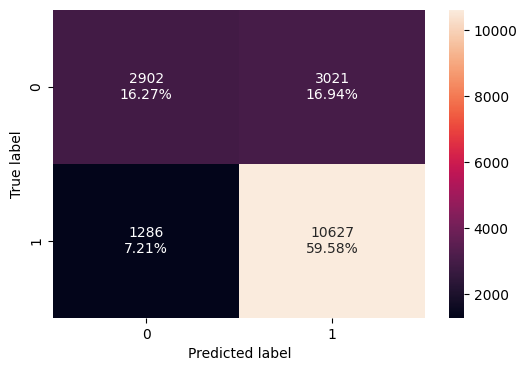

In [ ]:
# Creating the confusion matrix
confusion_matrix_sklearn(stacking, X_train, y_train)

In [ ]:
# Calculating the metrics
stacking_train_perf = model_performance_classification_sklearn(stacking, X_train, y_train)
stacking_train_perf

,Accuracy,Recall,Precision,F1
0,0.758522,0.892051,0.778649,0.831501


### Stacking model performance on test set

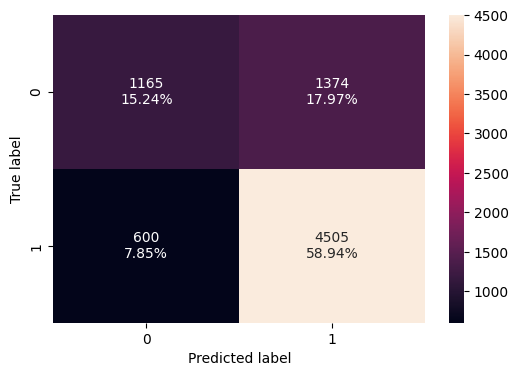

In [ ]:
# Visualizing the confusion matrix
confusion_matrix_sklearn(stacking, X_test, y_test)

In [ ]:
# Checking the metrics on test set
stacking_test_perf = model_performance_classification_sklearn(stacking, X_test, y_test)
stacking_test_perf

,Accuracy,Recall,Precision,F1
0,0.741758,0.882468,0.766287,0.820284


* The stacking classifier is performing well on training and test data.
* It is not overfitting.
* It's giving similar results as tuned Adaboost classifier.

## Model performance comparison and conclusions

In [ ]:
# Training performance comparison

models_train_comp = pd.concat([dTree_train_perf.T, dTree_tuned_train_perf.T, lg_train_perf.T, lg1_train_perf.T, bagging_train_perf.T, bagging_tuned_train_perf.T, bagging_lr_train_perf.T, rf_train_perf.T, rf_tuned_train_perf.T, ab_train_perf.T, ab_tuned_train_perf.T, gb_train_perf.T, gb_tuned_train_perf.T, xgb_train_perf.T, xgb_tuned_train_perf.T, stacking_train_perf.T], axis=1)

models_train_comp.columns = [ "Decision Tree", "Decision Tree Tuned", "Logistic Regression", "Tuned Logistic Regression", "Bagging", "Bagging Tuned", "Bagging with logistic regression", "Random Forest", "Random Forest Tuned", "Adaboost Regressor", "Adaboost Tuned", "Gradient Boost Estimator",
    "Gradient Boost Tuned", "XGB", "XGB Tuned", "Stacking Classifier"]

print('Training performance comparison:')
models_train_comp

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Logistic Regression,Tuned Logistic Regression,Bagging,Bagging Tuned,Bagging with logistic regression,Random Forest,Random Forest Tuned,Adaboost Regressor,Adaboost Tuned,Gradient Boost Estimator,Gradient Boost Tuned,XGB,XGB Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.739123,0.739291,0.985198,0.998374,0.667919,1.0,0.794629,0.738226,0.756504,0.758802,0.754654,0.850807,0.762110,0.758522
Recall,1.0,0.931923,0.885419,0.885335,0.986066,0.999748,1.000000,1.0,0.907412,0.887182,0.885419,0.883740,0.885587,0.935952,0.888189,0.892051
Precision,1.0,0.720067,0.762359,0.762562,0.991726,0.997822,0.667919,1.0,0.808527,0.760688,0.779831,0.783042,0.777852,0.854537,0.784243,0.778649
F1,1.0,0.812411,0.819294,0.819375,0.988888,0.998784,0.800901,1.0,0.855120,0.819080,0.829278,0.830349,0.828230,0.893394,0.832986,0.831501


In [ ]:
# Testing set performance comparison
models_test_comp = pd.concat([dTree_test_perf.T, dTree_tuned_test_perf.T, lg_test_perf.T, lg1_test_perf.T, bagging_test_perf.T, bagging_tuned_test_perf.T, bagging_lr_test_perf.T, rf_test_perf.T, rf_tuned_test_perf.T, ab_test_perf.T, ab_tuned_test_perf.T, gb_test_perf.T, gb_tuned_test_perf.T, xgb_test_perf.T, xgb_tuned_test_perf.T, stacking_test_perf.T], axis=1)

models_test_comp.columns = ["Decision Tree", "Decision Tree Tuned", "Logistic Regression", "Tuned Logistic Regression", "Bagging", "Bagging Tuned", "Bagging with logistic regression", "Random Forest", "Random Forest Tuned", "Adaboost Regressor", "Adaboost Tuned", "Gradient Boost", "Gradient Boost Tuned", "XGB", "XGB Tuned", "Stacking Classifier"]
print('Testing performance comparison:')
models_test_comp

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Logistic Regression,Tuned Logistic Regression,Bagging,Bagging Tuned,Bagging with logistic regression,Random Forest,Random Forest Tuned,Adaboost Regressor,Adaboost Tuned,Gradient Boost,Gradient Boost Tuned,XGB,XGB Tuned,Stacking Classifier
Accuracy,0.655285,0.706567,0.734694,0.736002,0.694662,0.726452,0.667844,0.721088,0.743590,0.734301,0.741235,0.744767,0.744375,0.729199,0.744898,0.741758
Recall,0.750049,0.930852,0.884623,0.886386,0.765916,0.889324,1.000000,0.833888,0.873262,0.885015,0.877767,0.876004,0.878746,0.851322,0.877767,0.882468
Precision,0.738049,0.715447,0.758354,0.758846,0.774411,0.748434,0.667844,0.768273,0.772483,0.757799,0.767952,0.772366,0.770658,0.768252,0.771655,0.766287
F1,0.744001,0.809058,0.816637,0.817673,0.770140,0.812819,0.800847,0.799737,0.819787,0.816481,0.819196,0.820927,0.821161,0.807657,0.821298,0.820284


* Many of the models (Decision Tree, Random Forest, Bagging, Bagging tuned, Random Forest, XGBoost) are overfitting the training data.
* Bagging with logistic regression is generalizing well. However, Accuracy and Precision scores are very low.
* Although a lot of the models are performing well based on our selected metric (F1 score). The best performing models based on our selected metric (F1 score) are Gradient Boosting, Tuned Gradient Boosting, and Tuned XGBoost.
* Overall, the best performing model on all metrics for train and test sets is XGBoost tuned.
* Based on model performance on train and test sets and ease of interpretability, we will select Tuned Gradient Boosting as our final model.

## Feature importance of selected model

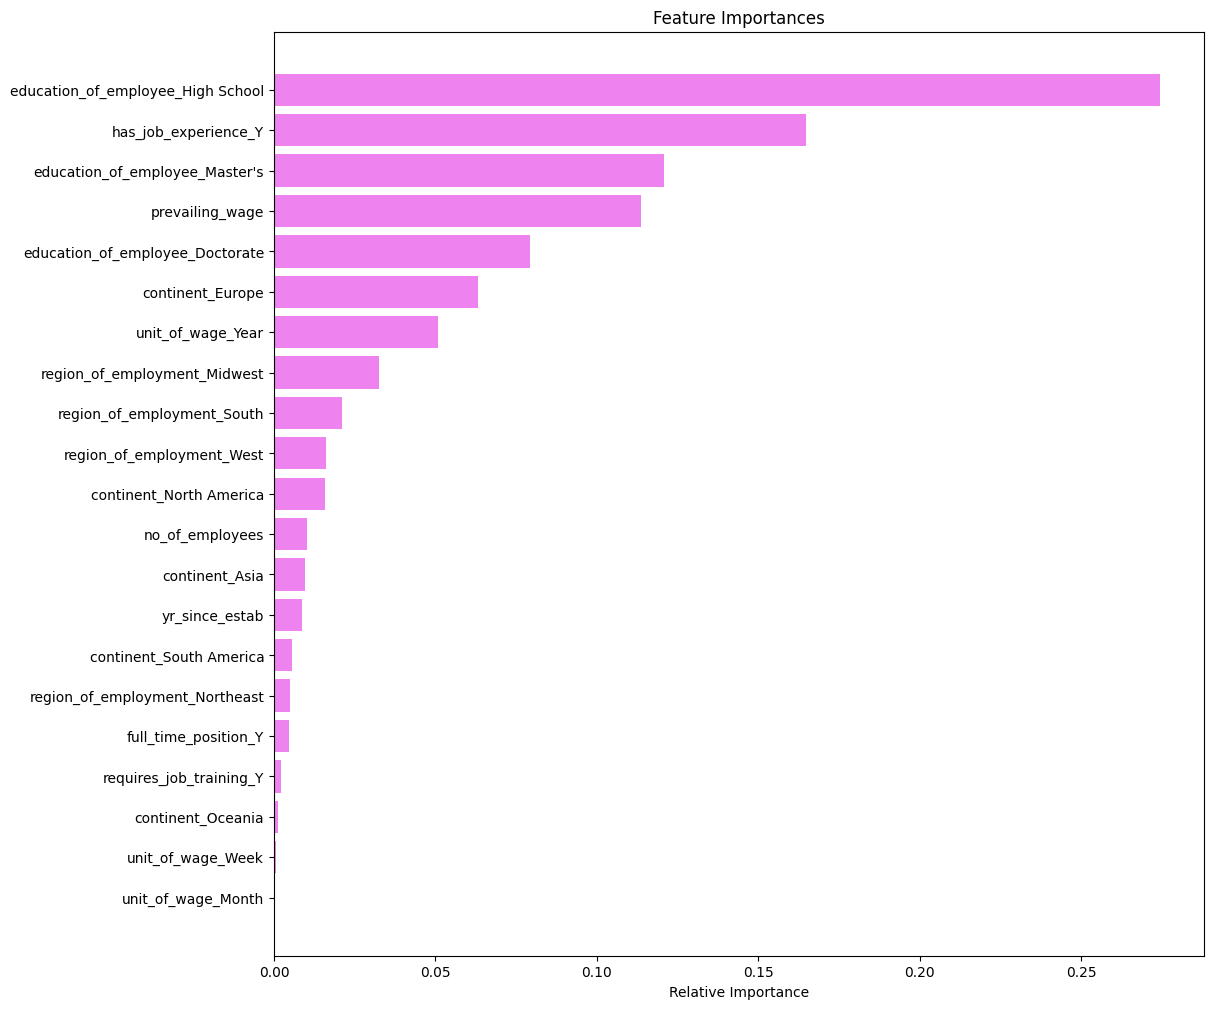

In [ ]:
# Printing a visual of important features
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* From the important features graph, we see that High School education is the most important aspect.
* Followed by Bachelor's education and having job experience.

## Actionable insights and recommendations

* The dataset consisted on 25480 rows and 12 columns. It compiles data about work visa applications.
* We built multiple models to help us predict the likelihood of a visa being approved or denied. This model will help the OFLC process job certification applications efficiently.
* Tuned Gradient Boosting model was selected as the final model due to the performance scores and feasiblity of using the model.
* The selection of a different model could be discussed if the company deems it necessary.

### EDA Insights

* 66% of the visa requests are from Asia. Followed by Europe and North America with 14.6 and 12.9 respectively.
* Europe has the highest certified rate at around 80%. Asia and North America have a much percentage certified rate at 60 to 65%.
* 3 fourths of the workers have either a Bachelor's or master's degree.
* Most of the workers (88%) don't require job training. Which is surprising because 41.9% of the applicants don't have work experience.
* 89.4% of the applications are for full time jobs.
* Northeast, South, and West receive most of the visa requests.
* Almost 67% (2/3) of the applications are certified.
* A visa is more likely to be certified if the worker has job experience.
* There is a positive correlation between education level and visa certification rate. The higher the education a worker has, the more likely the visa approval.

**Based on our EDA analysis, a suitable profile will have higher education (at least a bachelor's), with job experience, applying in Midwest or South, and be from Europe or Africa.**

### Insights from our selected Machine Learning model

Based on our selected classifier (Tuned Gradient Boosting) these are some insights:
* We based our model building and selection primarily on F1 score of the model. We consider that False negatives and false positives both have high cost. Therefore, we chose F1 score as our criterion for a balanced solution to visa approvals.
* We tried to optimize the metric on all our models, and concluded that tuned gradient boosting classifier was the best performing model with an F1 score of 0.82 on train and test sets.
* This model also performs well on all other metrics and is easier to interpret as compared to other similar performing models.
* The top four important features to consider are: High School education, having job experience, education level of a master's, and prevailing wage.

### Business Recommendations

* Based on visa approval rates and important features of our model, OFLC could screen applications through different levels.
  * First, sort through applicants by education. Starting with higher education levels (first doctorate, then masters, then bachelors, and end with high school).
  * Classify applications based on job experience. Applicants with job experience are more likely to get a certified visa.
  * Lastly, order applications based on prevailing wage. The higher the prevailing wage, more likely the visa approval.
* Following on the previously mentioned recommendation, it is also suggested that the company quickly discards applications with a high chance of denial.

* For further analysis, it would be interesting to analyze visa applications based on job sector and experience level.
* Another aspect that could have an impact on visa applications, is the age of the applicant. It could be a beneficial addition to the data instead of year of establishment.